# Temporal trend assessment

In [1]:
import pymannkendall as mk
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.axes_grid1 import make_axes_locatable
import statsmodels.api as sm
from pyts.decomposition import SingularSpectrumAnalysis

## 1 Trends in global vulnerabilities
## 2 Trends in regional vulnerabilities
    ## 2.1 Regional vulnerabilities Main
    ## 2.2 Regional vulnerabilities EM-DAT
## 3 Trends in vulnerabilities for income groups
    ## 3.1 Vulnerabilities for income groups (Main)
    ## 3.2 Vulnerabilities for income groups EM-DAT
## 4 Trends assessment in socio-economic variables

In [2]:
natcat_matched=pd.read_csv('/home/insauer/projects/submission_vul_sat/data_prepared/FLODIS_NatCat_fatalities_damages_filled.csv')
emdat_matched=pd.read_csv('/home/insauer/projects/submission_vul_sat/data_prepared/FLODIS_fatalities_damages_filled.csv')
idmc_matched=pd.read_csv('/home/insauer/projects/submission_vul_sat/data_prepared/FLODIS_displacements_filled.csv')

In [3]:
emdat_matched

Unnamed: 0 ISO3    year           disasterno  total_deaths  no_injured  \
0             0  NPL  2005.0            2005-0556          51.0         NaN   
1             1  BGR  2002.0            2002-0552           1.0         NaN   
2             2  LAO  2002.0            2002-0614           2.0         NaN   
3             3  ECU  2013.0            2013-0372           NaN         NaN   
4             4  MEX  2007.0            2007-0435           NaN         NaN   
..          ...  ...     ...                  ...           ...         ...   
692         692  IDN  2006.0  2006-0074,2005-0718          98.0        30.0   
693         693  GBR  2007.0  2007-0247,2007-0201           7.0         0.0   
694         694  BRA  2008.0  2008-0016,2008-0041          13.0        12.0   
695         695  AUS  2010.0  2010-0103,2010-0066           NaN         0.0   
696         696  AUS  2012.0  2012-0037,2012-0029           4.0         0.0   

     no_affected_EMDAT  no_homeles  total_affected_EMDAT  \
0               1600.0         NaN                1600.0   
1                  NaN         NaN                   NaN   
2             150000.0         NaN              150000.0   
3              25567.0         NaN               25567.0   
4              55000.0         NaN               55000.0   
..                 ...         ...                   ...   
692            17781.0         0.0               17811.0   
693              200.0     30000.0               30200.0   
694            60929.0      1435.0               62376.0   
695                0.0         0.0                   0.0   
696            16000.0         0.0               16000.0   

     total_damages_(000_USD)  ...  exposed_asset         income_group regions  \
0                        NaN  ...   6.458519e+08  Lower middle income     NaN   
1                     1000.0  ...   1.140910e+09  Upper middle income     NaN   
2                        NaN  ...   5.920839e+09  Lower middle income     NaN   
3                        NaN  ...   1.243118e+07  Upper middle income     NaN   
4                        NaN  ...   6.612194e+10  Upper middle income     NaN   
..                       ...  ...            ...                  ...     ...   
692                  27100.0  ...   3.252702e+11  Lower middle income     NaN   
693                4448000.0  ...   2.114308e+10          High income     NaN   
694                      0.0  ...   6.727088e+09  Upper middle income     NaN   
695                 109000.0  ...   4.894458e+09          High income     NaN   
696                 588000.0  ...   8.473875e+09          High income     NaN   

                        region  development  vul_asset  log_vul_asset  \
0                   South Asia          low        NaN            NaN   
1        Europe & Central Asia         high   0.001037      -2.984373   
2          East Asia & Pacific          low        NaN            NaN   
3    Latin America & Caribbean         high        NaN            NaN   
4    Latin America & Caribbean         high        NaN            NaN   
..                         ...          ...        ...            ...   
692        East Asia & Pacific       medium   0.000059      -4.227330   
693      Europe & Central Asia    very high   0.219748      -0.658074   
694  Latin America & Caribbean         high   0.000000            NaN   
695        East Asia & Pacific    very high   0.022658      -1.644780   
696        East Asia & Pacific    very high   0.066305      -1.178456   

      vul_fat  log_vul_fat  modeled_fld_exp  
0    0.010975    -1.959602             29.4  
1    0.000177    -3.751818             17.2  
2    0.000017    -4.762483             39.7  
3         NaN          NaN             21.1  
4         NaN          NaN             17.2  
..        ...          ...              ...  
692  0.000040    -4.394752             27.0  
693  0.000720    -3.142881             11.0  
694  0.005017    -2.299524             11.7  
695       NaN          Na

In [4]:
natcat_matched['day_plot']=(natcat_matched['days']/365)+2000
emdat_matched['day_plot']=(emdat_matched['days']/365)+2000
idmc_matched['day_plot']=(idmc_matched['days']/365)+2000

In [5]:
natcat_matched=natcat_matched.sort_values(by=['days'])
emdat_matched=emdat_matched.sort_values(by=['days'])
idmc_matched=idmc_matched.sort_values(by=['days'])

In [6]:
natcat_matched

Unnamed: 0    year  ISO  tot_loss  ins_loss  tot_loss_GDP  tot_loss_GCP  \
651         719  2000.0  ROU     70.50       0.0    352.558350    331.503207   
0             0  2000.0  HUN     55.00       0.0    147.151583    122.454554   
1             2  2000.0  KHM      6.00       0.0     31.808774     29.077715   
2             3  2000.0  THA      0.05       0.0      0.156322      0.201686   
3             4  2000.0  VNM     17.00       0.0    102.196978    119.841722   
..          ...     ...  ...       ...       ...           ...           ...   
799         867  2016.0  MYS      2.11       0.0      2.110000      2.110000   
647         715  2016.0  THA     60.00       0.0     60.000000     60.000000   
648         716  2016.0  MYS     50.00       0.0     50.000000     50.000000   
649         717  2016.0  AUS      0.30       0.0      0.300000      0.300000   
650         718  2016.0  ARG     20.00       0.0     20.000000     20.000000   

     tot_loss_CPI  Fatalities    CPI_conv  ...         income_group  regions  \
651    135.473834         9.0         NaN  ...          High income      NaN   
0      106.467830         1.0  138.597299  ...          High income      NaN   
1       11.423164        13.0   10.135017  ...  Lower middle income      NaN   
2        0.081702         7.0    0.088051  ...  Upper middle income      NaN   
3       33.634141         3.0   28.481859  ...  Lower middle income      NaN   
..            ...         ...         ...  ...                  ...      ...   
799      2.110000         2.0         NaN  ...  Upper middle income      NaN   
647     60.000000        22.0   64.662610  ...  Upper middle income      NaN   
648     50.000000         3.0   60.468339  ...  Upper middle income      NaN   
649      0.300000         0.0    0.376097  ...          High income      NaN   
650     20.000000         1.0   23.597991  ...  Upper middle income      NaN   

                        region  development     vul_asset  log_vul_asset  \
651      Europe & Central Asia         high  3.060364e-03      -2.514227   
0        Europe & Central Asia         high  2.239871e-02      -1.649777   
1          East Asia & Pacific          low  5.196278e-04      -3.284308   
2          East Asia & Pacific       medium  2.887032e-07      -6.539548   
3          East Asia & Pacific       medium  4.145630e-04      -3.382410   
..                         ...          ...           ...            ...   
799        East Asia & Pacific         high  3.402589e-06      -5.468191   
647        East Asia & Pacific         high  3.159809e-05      -4.500339   
648        East Asia & Pacific         high  5.736032e-05      -4.241388   
649        East Asia & Pacific    very high  1.370076e-05      -4.863255   
650  Latin America & Caribbean    very high  1.584470e-04      -3.800116   

      vul_fat log_vul_fat  modeled_fld_exp     day_plot  
651  0.000513   -3.289688             19.4  2000.224658  
0    0.000213   -3.672190             15.9  2000.263014  
1    0.000006   -5.252920             38.1  2000.523288  
2    0.000026   -4.580360             33.9  2000.526027  
3    0.000001   -5.919318             46.0  2000.583562  
..        ...         ...              ...          ...  
799  0.000008   -5.103467             24.0  2016.871233  
647  0.000010   -4.982900             33.9  2016.928767  
648  0.000005   -5.261678             24.0  2016.991781  
649  0.000000         NaN              7.9  2016.994521  
650  0.000003   -5.592268             16.1  2016.994521  

[800 rows x 94 columns]

In [7]:
natcat_matched.columns

Index(['Unnamed: 0', 'year', 'ISO', 'tot_loss', 'ins_loss', 'tot_loss_GDP',
       'tot_loss_GCP', 'tot_loss_CPI', 'Fatalities', 'CPI_conv', 'GDP_conv',
       'unexact_conv', 'CPI_conv_ppp', 'GDP_conv_ppp', 'unexact_conv_ppp',
       'index', 'DFO_matches', 'DFO_matches_nr', 'matching_type',
       'DFO_matches_time_dif', 'DFO_duration', 'DFO_satellite_shape_area',
       'affected_sum_GHSL', 'affected_mean_GHSL',
       'DFO_satellite_shape_pop_density_GHSL', 'affected_sum_GPW',
       'affected_mean_GPW', 'DFO_satellite_shape_pop_density_GPW',
       'GDP_affected_sum', 'cable_affected_sum', 'plant_affected_sum',
       'power_pole_affected_sum', 'power_tower_affected_sum',
       'line_affected_sum', 'mast_affected_sum',
       'communication_tower_affected_sum', 'doctors_affected_sum',
       'hospital_affected_sum', 'pharmacy_affected_sum',
       'primary_road_affected_sum', 'tertiary_road_affected_sum',
       'reservoir_affected_sum', 'school_affected_sum',
       'university_

## 1 Trends in global vulnerabilities

In [8]:
natcat_matched['vul_asset']=natcat_matched['vul_asset'].replace([np.inf,-np.inf],[np.nan,-np.nan])
natcat_matched['vul_fat']=natcat_matched['vul_fat'].replace([np.inf,-np.inf],[np.nan,-np.nan])
emdat_matched['vul_asset']=emdat_matched['vul_asset'].replace([np.inf,-np.inf],[np.nan,-np.nan])
emdat_matched['vul_fat']=emdat_matched['vul_fat'].replace([np.inf,-np.inf],[np.nan,-np.nan])
idmc_matched['vul_dis']=idmc_matched['vul_dis'].replace([np.inf,-np.inf],[np.nan,-np.nan])

In [9]:
natcat_matched=natcat_matched.sort_values(by=['days'])
emdat_matched=emdat_matched.sort_values(by=['days'])
idmc_matched=idmc_matched.sort_values(by=['days'])

In [10]:
variables_log=['log_vul_asset', 'log_vul_fat', 'log_vul_dis']
variables=['vul_asset', 'vul_fat', 'vul_dis']
trends=pd.DataFrame()
for c in [0,1,2,3,4]:
    temp_results=pd.DataFrame()
    if c in [0,1]:
        v=c
        dat=natcat_matched[variables[c]].reset_index().drop(columns='index')
        dat_log=natcat_matched[variables_log[c]].reset_index().drop(columns='index')
        day_plot=natcat_matched['day_plot'].reset_index().drop(columns='index')
        yearly_means=natcat_matched.groupby('year').mean()
        yearly_medians=natcat_matched.groupby('year').median()
    elif c in [2,3]:
        v=c-2                   
        dat=emdat_matched[variables[c-2]].reset_index().drop(columns='index')
        dat_log=emdat_matched[variables_log[c-2]].reset_index().drop(columns='index')
        day_plot=emdat_matched['day_plot'].reset_index().drop(columns='index')
        yearly_means=emdat_matched.groupby('year').mean()
        yearly_medians=emdat_matched.groupby('year').median()
    else:
        v=2
        dat=idmc_matched[variables[2]].reset_index().drop(columns='index')
        dat_log=idmc_matched[variables_log[2]].reset_index().drop(columns='index')
        day_plot=idmc_matched['day_plot'].reset_index().drop(columns='index')
        yearly_means=idmc_matched.groupby('year').mean()
        yearly_medians=idmc_matched.groupby('year').median()
                  
    sig = mk.original_test(dat.dropna(), alpha=0.1)
    sig_year= mk.original_test(yearly_means[variables[v]].dropna(), alpha=0.1)
    
    if sig.p<0.001:
        
        mk_slope="%.3E" % sig.slope+'***'
    elif sig.p<0.01:
        mk_slope="%.3E" % sig.slope+'**'
    elif sig.p<0.05:
        mk_slope="%.3E" % sig.slope+'*'
    else:
        mk_slope="%.3E" % sig.slope
    
    
    if sig_year.p<0.001:
        
        mk_slope_ann="%.3E" % sig_year.slope+'***'
    elif sig_year.p<0.01:
        mk_slope_ann="%.3E" % sig_year.slope+'**'
    elif sig_year.p<0.05:
        mk_slope_ann="%.3E" % sig_year.slope+'*'
    else:
        mk_slope_ann="%.3E" % sig_year.slope
    
    temp_results.loc[c, 'Mann-Kendall']=mk_slope

    temp_results.loc[c, 'Mann-Kendall annual mean']=mk_slope_ann
    
    df1=pd.DataFrame()
    
    
    df1=day_plot
    df1['const']=1
    reg1 = sm.OLS(endog=dat_log, exog=df1[['const','day_plot']], 
        missing='drop')

    results = reg1.fit()
    y_ax=results.params[0]
    slope= results.params[1]
    y = slope*np.arange(2000,2019) + y_ax

    r=results.pvalues[1]
    
    if r<0.001:
        
        sl="%.3f" % round(slope,3)+'***'
    elif r<0.01:
        sl="%.3f" % round(slope,3)+'**'
    elif r<0.05:
        sl="%.3f" % round(slope,3)+'*'
    else:
        sl="%.3f" % round(slope,3)
    

    temp_results.loc[c, 'OLS slope']=sl


    df1=pd.DataFrame()
    df1['day_plot']=yearly_means.index
    df1['const']=1
    reg1 = sm.OLS(endog=yearly_means.reset_index()[variables_log[v]], exog=df1[['const','day_plot']], 
        missing='drop')

    results = reg1.fit()
    y_ax=results.params[0]
    slope= results.params[1]
    y = slope*np.arange(2000,2019) + y_ax

    r_year=results.pvalues[1]
    
    if r_year<0.001:
        
        ols_slope= "%.3f" % round(slope,3)+'***'
    elif r_year<0.01:
        ols_slope="%.3f" % round(slope,3)+'**'
    elif r_year<0.05:
        ols_slope="%.3f" % round(slope,3)+'*'
    else:
        ols_slope="%.3f" % round(slope,3)

                         
    
    
    temp_results.loc[c, 'OLS annual mean']=ols_slope
    trends=trends.append(temp_results,ignore_index=True)
trends.index=['Damage NATCAT', 'Fatalities NATCAT', 'Damage EMDAT', 'Fatalities EMDAT', 'DIsplacement IDMC']
print(trends)
trends.to_csv('/home/insauer/projects/submission_vul_sat/supplementary_tables/tab_s4.csv')

                  Mann-Kendall Mann-Kendall annual mean OLS slope  \
Damage NATCAT       -2.390E-10               -1.180E-04    -0.005   
Fatalities NATCAT    0.000E+00                5.665E-06    -0.002   
Damage EMDAT         1.000E-06                2.858E-03    0.043*   
Fatalities EMDAT   1.261E-07**                7.553E-04   0.040**   
DIsplacement IDMC   -4.134E-05                1.265E+00    -0.043   

                  OLS annual mean  
Damage NATCAT              -0.019  
Fatalities NATCAT          -0.003  
Damage EMDAT              0.060**  
Fatalities EMDAT            0.019  
DIsplacement IDMC          -0.030  


## 2 Trends in regional vulnerabilities

### 2.1 Regional vulnerabilities (Main)

In [11]:
cm = 1/2.54
x_width= 18.0*cm
y_width= 21.5*cm
y_width

8.464566929133857

In [12]:
regions=list(set(natcat_matched['region'].dropna()))
regions.sort()

East Asia & Pacific
Europe & Central Asia
Latin America & Caribbean
Middle East & North Africa
North America
South Asia
Sub-Saharan Africa
                                        Mann-Kendall Mann-Kendall annual mean  \
East Asia & Pacific Damage                -2.558E-08               -2.498E-05   
East Asia & Pacific Fatalities             0.000E+00               -7.339E-07   
East Asia & Pacific Displacement           1.108E-04               8.341E-01*   
Europe & Central Asia Damage              -1.543E-08               -1.494E-05   
Europe & Central Asia Fatalities           0.000E+00                6.800E-09   
Europe & Central Asia Displacement        -1.023E-03               -4.577E-03   
Latin America & Caribbean Damage           3.361E-08                2.001E-05   
Latin America & Caribbean Fatalities      -5.480E-08               -2.539E-06   
Latin America & Caribbean Displacement    -1.749E-03                4.526E-02   
Middle East & North Africa Damage         -5.947E-0

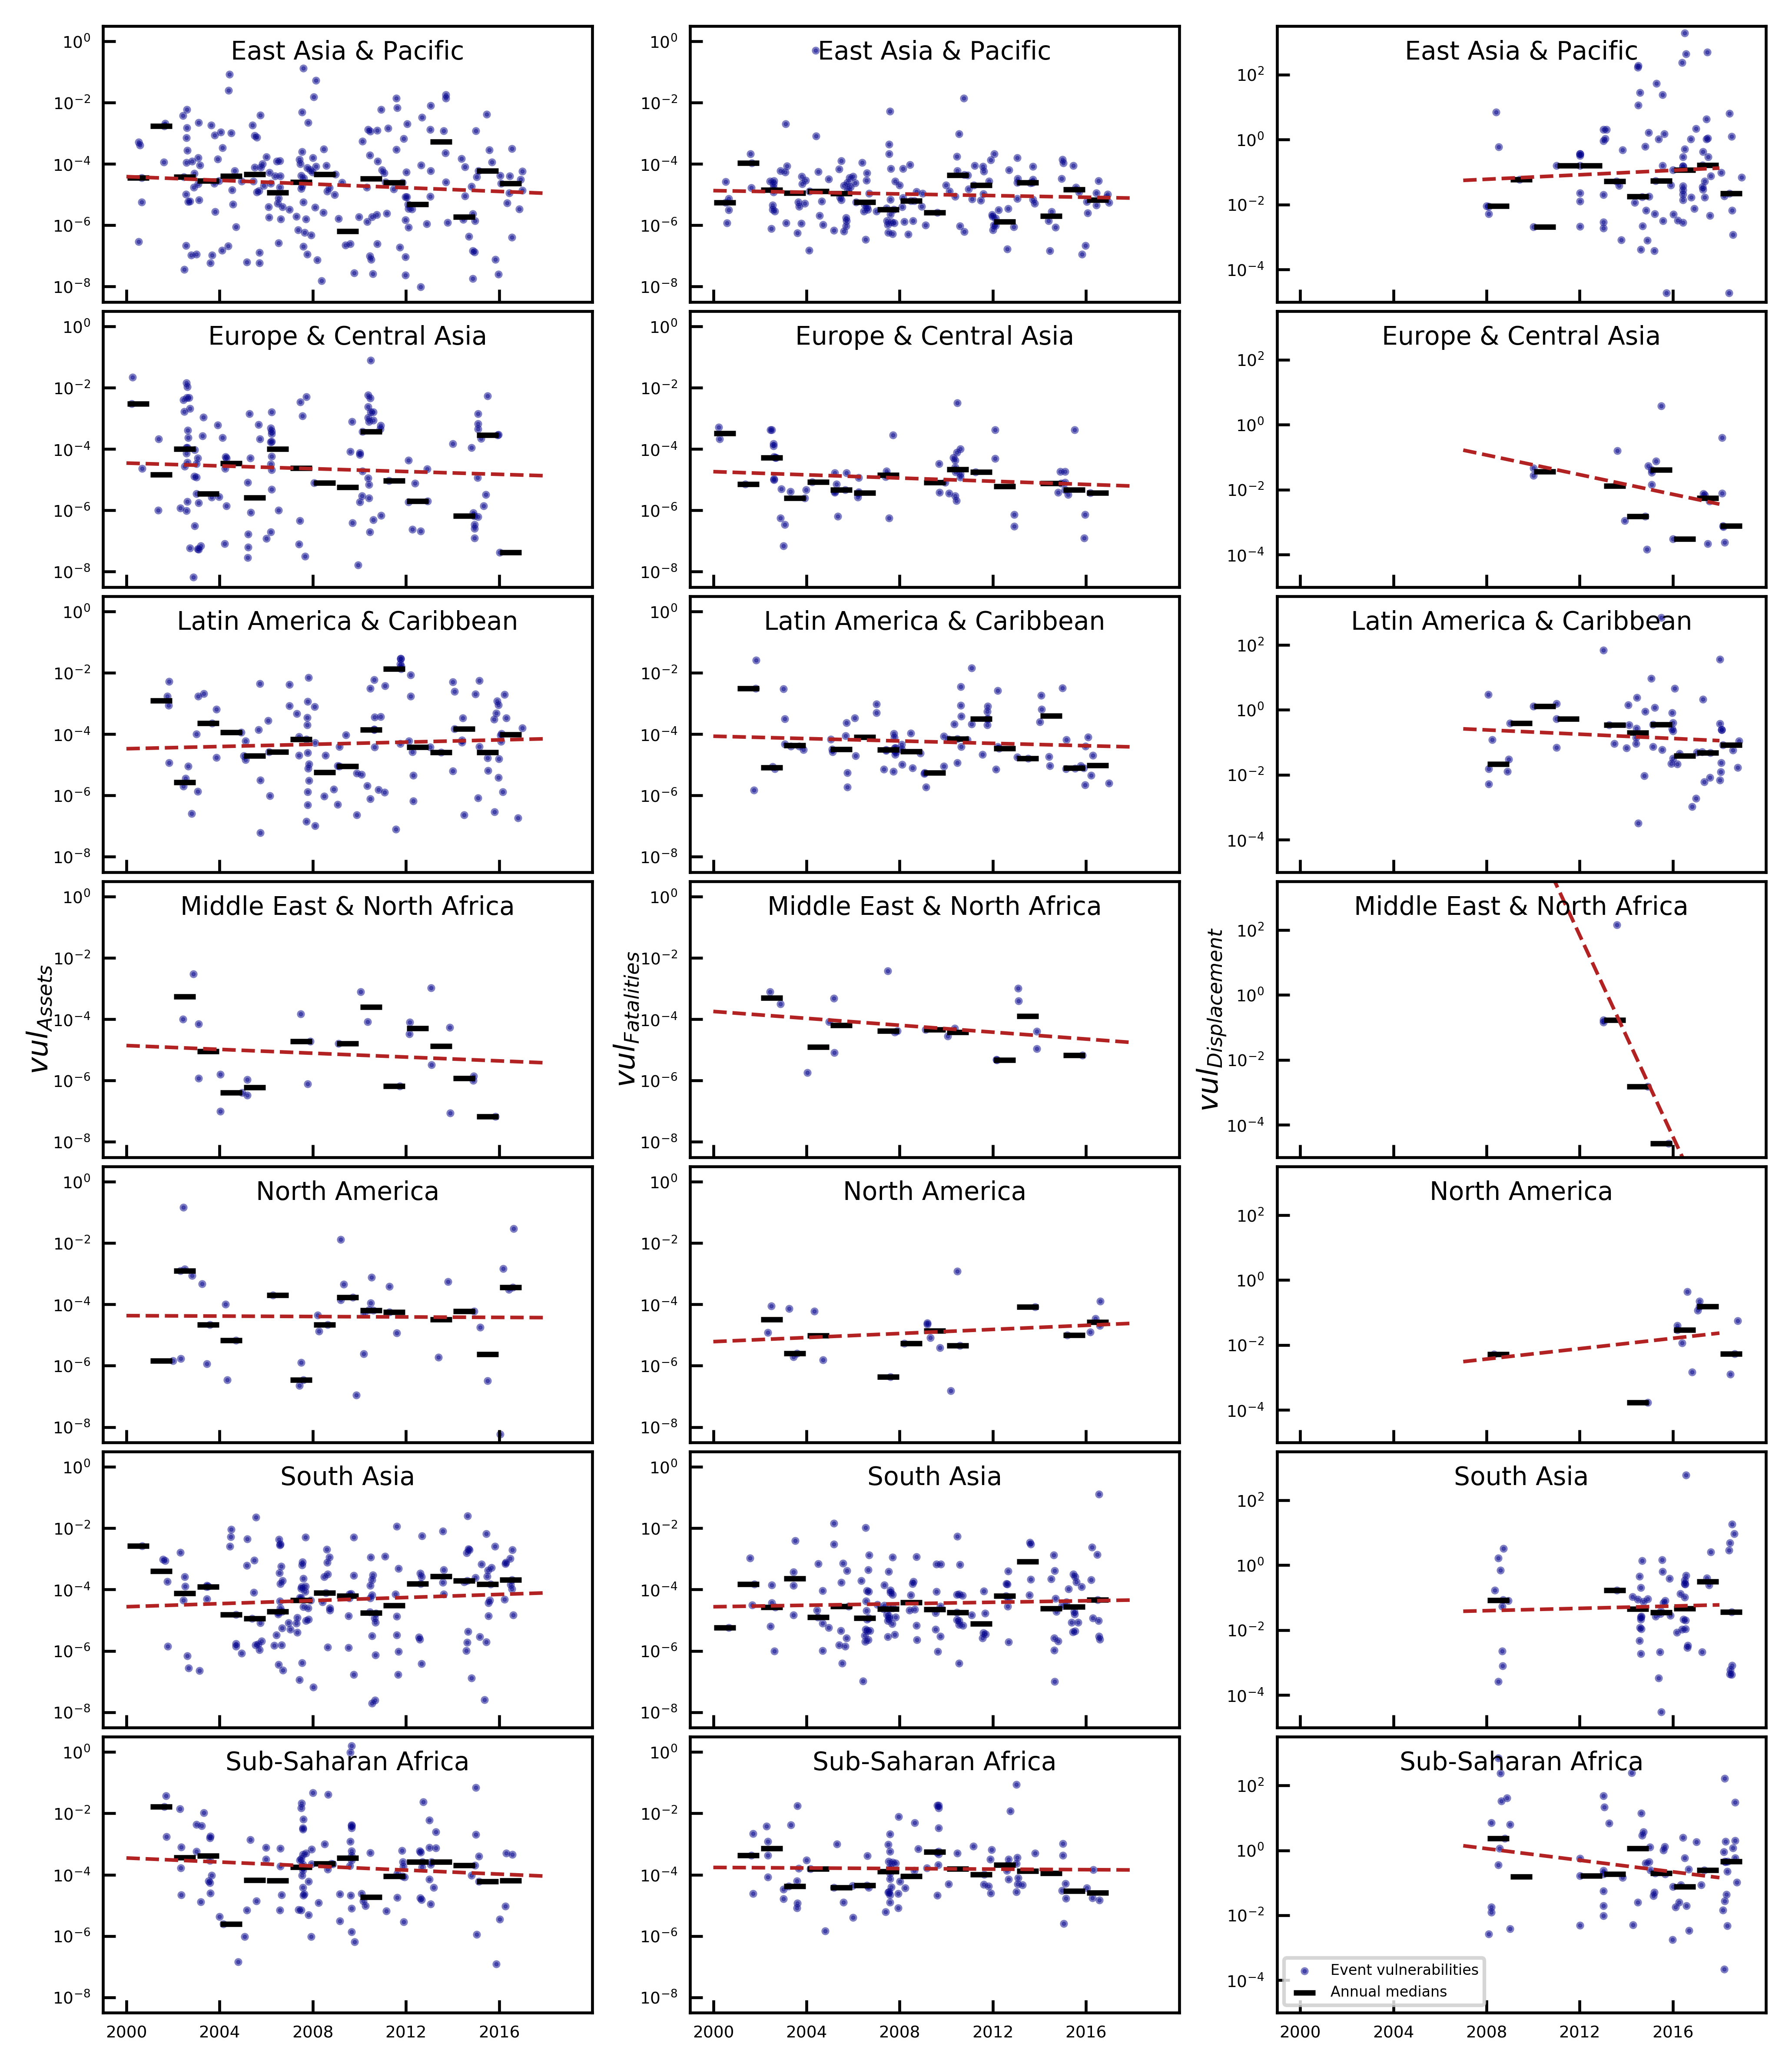

In [13]:
fig1 = plt.figure(figsize=(x_width,y_width), dpi=600)
plt.subplots_adjust(top=0.95, bottom= 0.05, left= 0.05, right=0.95, wspace=0.2, hspace=0.15)

fig1.patch.set_facecolor('white')
variables_log=['log_vul_asset', 'log_vul_fat', 'log_vul_dis']
variables=['vul_asset', 'vul_fat', 'vul_dis']

units=['Number events','Number events','Number events', 'Number events',
       'USD 2011 PPP','USD 2011 PPP', 'People', 'People']
titles=['NATCAT events since 1980','EMDAT events since 1980','NATCAT events since 2000',
        'EMDAT events since 2000', 'NATCAT Damage','EMDAT Damage', 'NATCAT Fatalities','EMDAT Fatalities']
gs = fig1.add_gridspec(28, 3)
trends=pd.DataFrame()
v=0
ending=['NATCAT', 'EMDAT']
names=['Damage', 'Fatalities','Displacement']



for i,row in enumerate([0,4,8,12,16,20,24]):
    print(regions[i])
    for col in [0,1,2]:
        temp_results=pd.DataFrame()
        f3_ax1 = fig1.add_subplot(gs[row: row+4, col:col+1])
        if col < 2:
            

            yearly_means=natcat_matched.loc[natcat_matched['region']==regions[i]].groupby('year').mean()
            yearly_medians=natcat_matched.loc[natcat_matched['region']==regions[i]].groupby('year').median()
            yearly_std=natcat_matched.loc[natcat_matched['region']==regions[i]].groupby('year').std()


            f3_ax1.scatter(natcat_matched.loc[natcat_matched['region']==regions[i],'day_plot'],
                           natcat_matched.loc[natcat_matched['region']==regions[i],variables_log[col]],
                            alpha=0.5, s=1.4, color='darkblue')
            
            f3_ax1.scatter(yearly_medians.index+0.5, yearly_medians[variables_log[col]],
                             marker='_',color='k')


            sig = mk.original_test(natcat_matched.loc[natcat_matched['region']==regions[i],variables[col]], alpha=0.1)
            sig_year= mk.original_test(yearly_means[variables[col]], alpha=0.1)
            df1=pd.DataFrame()
            
            if sig.p<0.001:

                mk_slope="%.3E" % sig.slope+'***'
            elif sig.p<0.01:
                mk_slope="%.3E" % sig.slope+'**'
            elif sig.p<0.05:
                mk_slope="%.3E" % sig.slope+'*'
            else:
                mk_slope="%.3E" % sig.slope
            
            if sig_year.p<0.001:

                mk_slope_ann="%.3E" % sig_year.slope+'***'
            elif sig_year.p<0.01:
                mk_slope_ann="%.3E" % sig_year.slope+'**'
            elif sig_year.p<0.05:
                mk_slope_ann="%.3E" % sig_year.slope+'*'
            else:
                mk_slope_ann="%.3E" % sig_year.slope
                
            temp_results.loc[regions[i] + ' '+names[col], 'Mann-Kendall']=mk_slope
            temp_results.loc[regions[i] + ' '+names[col], 'Mann-Kendall annual mean']=mk_slope_ann
            
            df1['day_plot']=natcat_matched.loc[natcat_matched['region']==regions[i],'day_plot']
            df1['const']=1

            reg1 = sm.OLS(endog=natcat_matched.loc[natcat_matched['region']==regions[i],variables_log[col]], exog=df1[['const','day_plot']], 
                missing='drop')

            results = reg1.fit()
            y_ax=results.params[0]
            slope= results.params[1]
            y = slope*np.arange(2000,2019) + y_ax

            r=results.pvalues[1]
            if r <0.05:
                f3_ax1.plot(np.arange(2000,2019), y, c ='firebrick', linewidth=1.6)
            else:
                f3_ax1.plot(np.arange(2000,2019), y, c ='firebrick', linewidth=1., linestyle='--')
            
            if r<0.001:
        
                sl="%.3f" % round(slope,3)+'***'
            elif r<0.01:
                sl="%.3f" % round(slope,3)+'**'
            elif r<0.05:
                sl="%.3f" % round(slope,3)+'*'
            else:
                sl="%.3f" % round(slope,3)
            
            
            df1=pd.DataFrame()
            df1['day_plot']=yearly_means.index
            df1['const']=1
            reg1 = sm.OLS(endog=yearly_means.reset_index()[variables_log[col]], exog=df1[['const','day_plot']], 
                missing='drop')

            results = reg1.fit()
            y_ax=results.params[0]
            slope= results.params[1]
            y = slope*np.arange(2000,2019) + y_ax

            r_year=results.pvalues[1]
            #f3_ax1.plot(np.arange(2000,2019), y, c =lgr, linewidth=0.6)
            
            if r<0.001:
        
                sl_year="%.3f" % round(slope,3)+'***'
            elif r<0.01:
                sl_year="%.3f" % round(slope,3)+'**'
            elif r<0.05:
                sl_year="%.3f" % round(slope,3)+'*'
            else:
                sl_year="%.3f" % round(slope,3)

            f3_ax1.set_ylim([-8.5,0.5])
            if i==3 and col==0:
                f3_ax1.set_ylabel('$vul_{Assets}$', fontsize=8, labelpad=-0.5)
            if i==3 and col==1:
                f3_ax1.set_ylabel('$vul_{Fatalities}$', fontsize=8, labelpad=-0.5)
            f3_ax1.set_yticks([-8,-6,-4,-2,0])
            f3_ax1.set_yticklabels(['$10^{-8}$','$10^{-6}$','$10^{-4}$','$10^{-2}$','$10^{0}$'], fontsize=5)
            
            
            
            temp_results.loc[regions[i] + ' '+names[col], 'OLS']=sl
            temp_results.loc[regions[i] + ' '+names[col], 'OLS annual mean']=sl_year
            trends=trends.append(temp_results,ignore_index=False)
        else:
            
            yearly_means=idmc_matched.loc[idmc_matched['region']==regions[i]].groupby('year').mean()
            yearly_std=idmc_matched.loc[idmc_matched['region']==regions[i]].groupby('year').std()
            yearly_medians=idmc_matched.loc[idmc_matched['region']==regions[i]].groupby('year').median()
            f3_ax1.scatter(idmc_matched.loc[idmc_matched['region']==regions[i],'day_plot'],
                           idmc_matched.loc[idmc_matched['region']==regions[i],variables_log[col]],
                            alpha=0.5, s=1.4,color='darkblue', label='Event vulnerabilities')


            sig = mk.original_test(idmc_matched.loc[idmc_matched['region']==regions[i],variables[col]], alpha=0.1)
            sig_year= mk.original_test(yearly_means[variables[col]], alpha=0.1)
            
            if sig.p<0.001:

                mk_slope="%.3E" % sig.slope+'***'
            elif sig.p<0.01:
                mk_slope="%.3E" % sig.slope+'**'
            elif sig.p<0.05:
                mk_slope="%.3E" % sig.slope+'*'
            else:
                mk_slope="%.3E" % sig.slope
                
                
            if sig_year.p<0.001:

                mk_slope_ann="%.3E" % sig_year.slope+'***'
            elif sig_year.p<0.01:
                mk_slope_ann="%.3E" % sig_year.slope+'**'
            elif sig_year.p<0.05:
                mk_slope_ann="%.3E" % sig_year.slope+'*'
            else:
                mk_slope_ann="%.3E" % sig_year.slope
                
            temp_results.loc[regions[i] + ' '+names[col], 'Mann-Kendall']=mk_slope
            temp_results.loc[regions[i] + ' '+names[col], 'Mann-Kendall annual mean']=mk_slope_ann

            
            f3_ax1.scatter(yearly_medians.index+0.5, yearly_medians[variables_log[col]],
                             marker='_',color='k', label='Annual medians')
            df1=pd.DataFrame()
            df1['day_plot']=idmc_matched.loc[idmc_matched['region']==regions[i],'day_plot']
            df1['const']=1

            reg1 = sm.OLS(endog=idmc_matched.loc[idmc_matched['region']==regions[i],variables_log[col]], exog=df1[['const','day_plot']], 
                missing='drop')

            results = reg1.fit()
            y_ax=results.params[0]
            slope= results.params[1]

            y = slope*np.arange(2007,2019)  + y_ax
            r=results.pvalues[1]
            
            
            if r<0.001:
        
                sl="%.3f" % round(slope,3)+'***'
            elif r<0.01:
                sl="%.3f" % round(slope,3)+'**'
            elif r<0.05:
                sl="%.3f" % round(slope,3)+'*'
            else:
                sl="%.3f" % round(slope,3)
            
            if r <0.05:
                f3_ax1.plot(np.arange(2007,2019) , y, c ='firebrick', linewidth=1.6)
            else:
                f3_ax1.plot(np.arange(2007,2019) , y, c ='firebrick', linewidth=1., linestyle='--')

            
            temp_results.loc[regions[i] + ' '+names[col], 'OLS']=sl

            
            
            df1=pd.DataFrame()
            df1['day_plot']=yearly_means.index
            df1['const']=1
            reg1 = sm.OLS(endog=yearly_means.reset_index()[variables_log[col]], exog=df1[['const','day_plot']], 
                missing='drop')

            results = reg1.fit()
            y_ax=results.params[0]
            slope= results.params[1]
            y = slope*np.arange(2007,2019) + y_ax

            r_year=results.pvalues[1]
            #f3_ax1.plot(np.arange(2007,2019), y, c =lgr, linewidth=0.6, label='trend yearly means')
            
            if r_year<0.001:
        
                sl_year="%.3f" % round(slope,3)+'***'
            elif r_year<0.01:
                sl_year="%.3f" % round(slope,3)+'**'
            elif r_year<0.05:
                sl_year="%.3f" % round(slope,3)+'*'
            else:
                sl_year="%.3f" % round(slope,3)

            
            f3_ax1.set_ylim([-5,3.5])
            f3_ax1.set_yticks([-4,-2,0,2])
            
            if i==3:
                f3_ax1.set_ylabel('$vul_{Displacement}$', fontsize=8, labelpad=-0.5)
            if i==6:
                f3_ax1.legend(fontsize=4, loc='lower left')
            f3_ax1.set_yticks([-4,-2,0,2])
            f3_ax1.set_yticklabels(['$10^{-4}$','$10^{-2}$','$10^{0}$','$10^{2}$'], fontsize=5)
            temp_results.loc[regions[i] + ' '+names[col], 'OLS annual mean']=sl_year

            trends=trends.append(temp_results,ignore_index=False)
        f3_ax1.set_title(regions[i], fontsize=7, y=0.8)
        f3_ax1.set_xlim([1999,2020])
        f3_ax1.set_xticks([2000,2004,2008,2012,2016])
        f3_ax1.tick_params(axis='both', which='major', labelsize=4.5,direction='in')
plt.savefig('/home/insauer/projects/submission_vul_sat/supplementary_figures/SI_trends_regions_natcat.png')
print(trends)
trends.to_csv('/home/insauer/projects/submission_vul_sat/supplementary_tables/regional_trends_natcat.csv')

In [14]:
natcat_matched['log_CISI_global_affected_mean']=np.log10(natcat_matched['CISI_global_affected_mean']).replace([np.inf,-np.inf], [np.nan,np.nan])
emdat_matched['log_CISI_global_affected_mean']=np.log10(emdat_matched['CISI_global_affected_mean']).replace([np.inf,-np.inf], [np.nan,np.nan])
idmc_matched['log_CISI_global_affected_mean']=np.log10(idmc_matched['CISI_global_affected_mean']).replace([np.inf,-np.inf], [np.nan,np.nan])

/home/insauer/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:679: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


East Asia & Pacific
Europe & Central Asia
Latin America & Caribbean
Middle East & North Africa
North America
South Asia
Sub-Saharan Africa


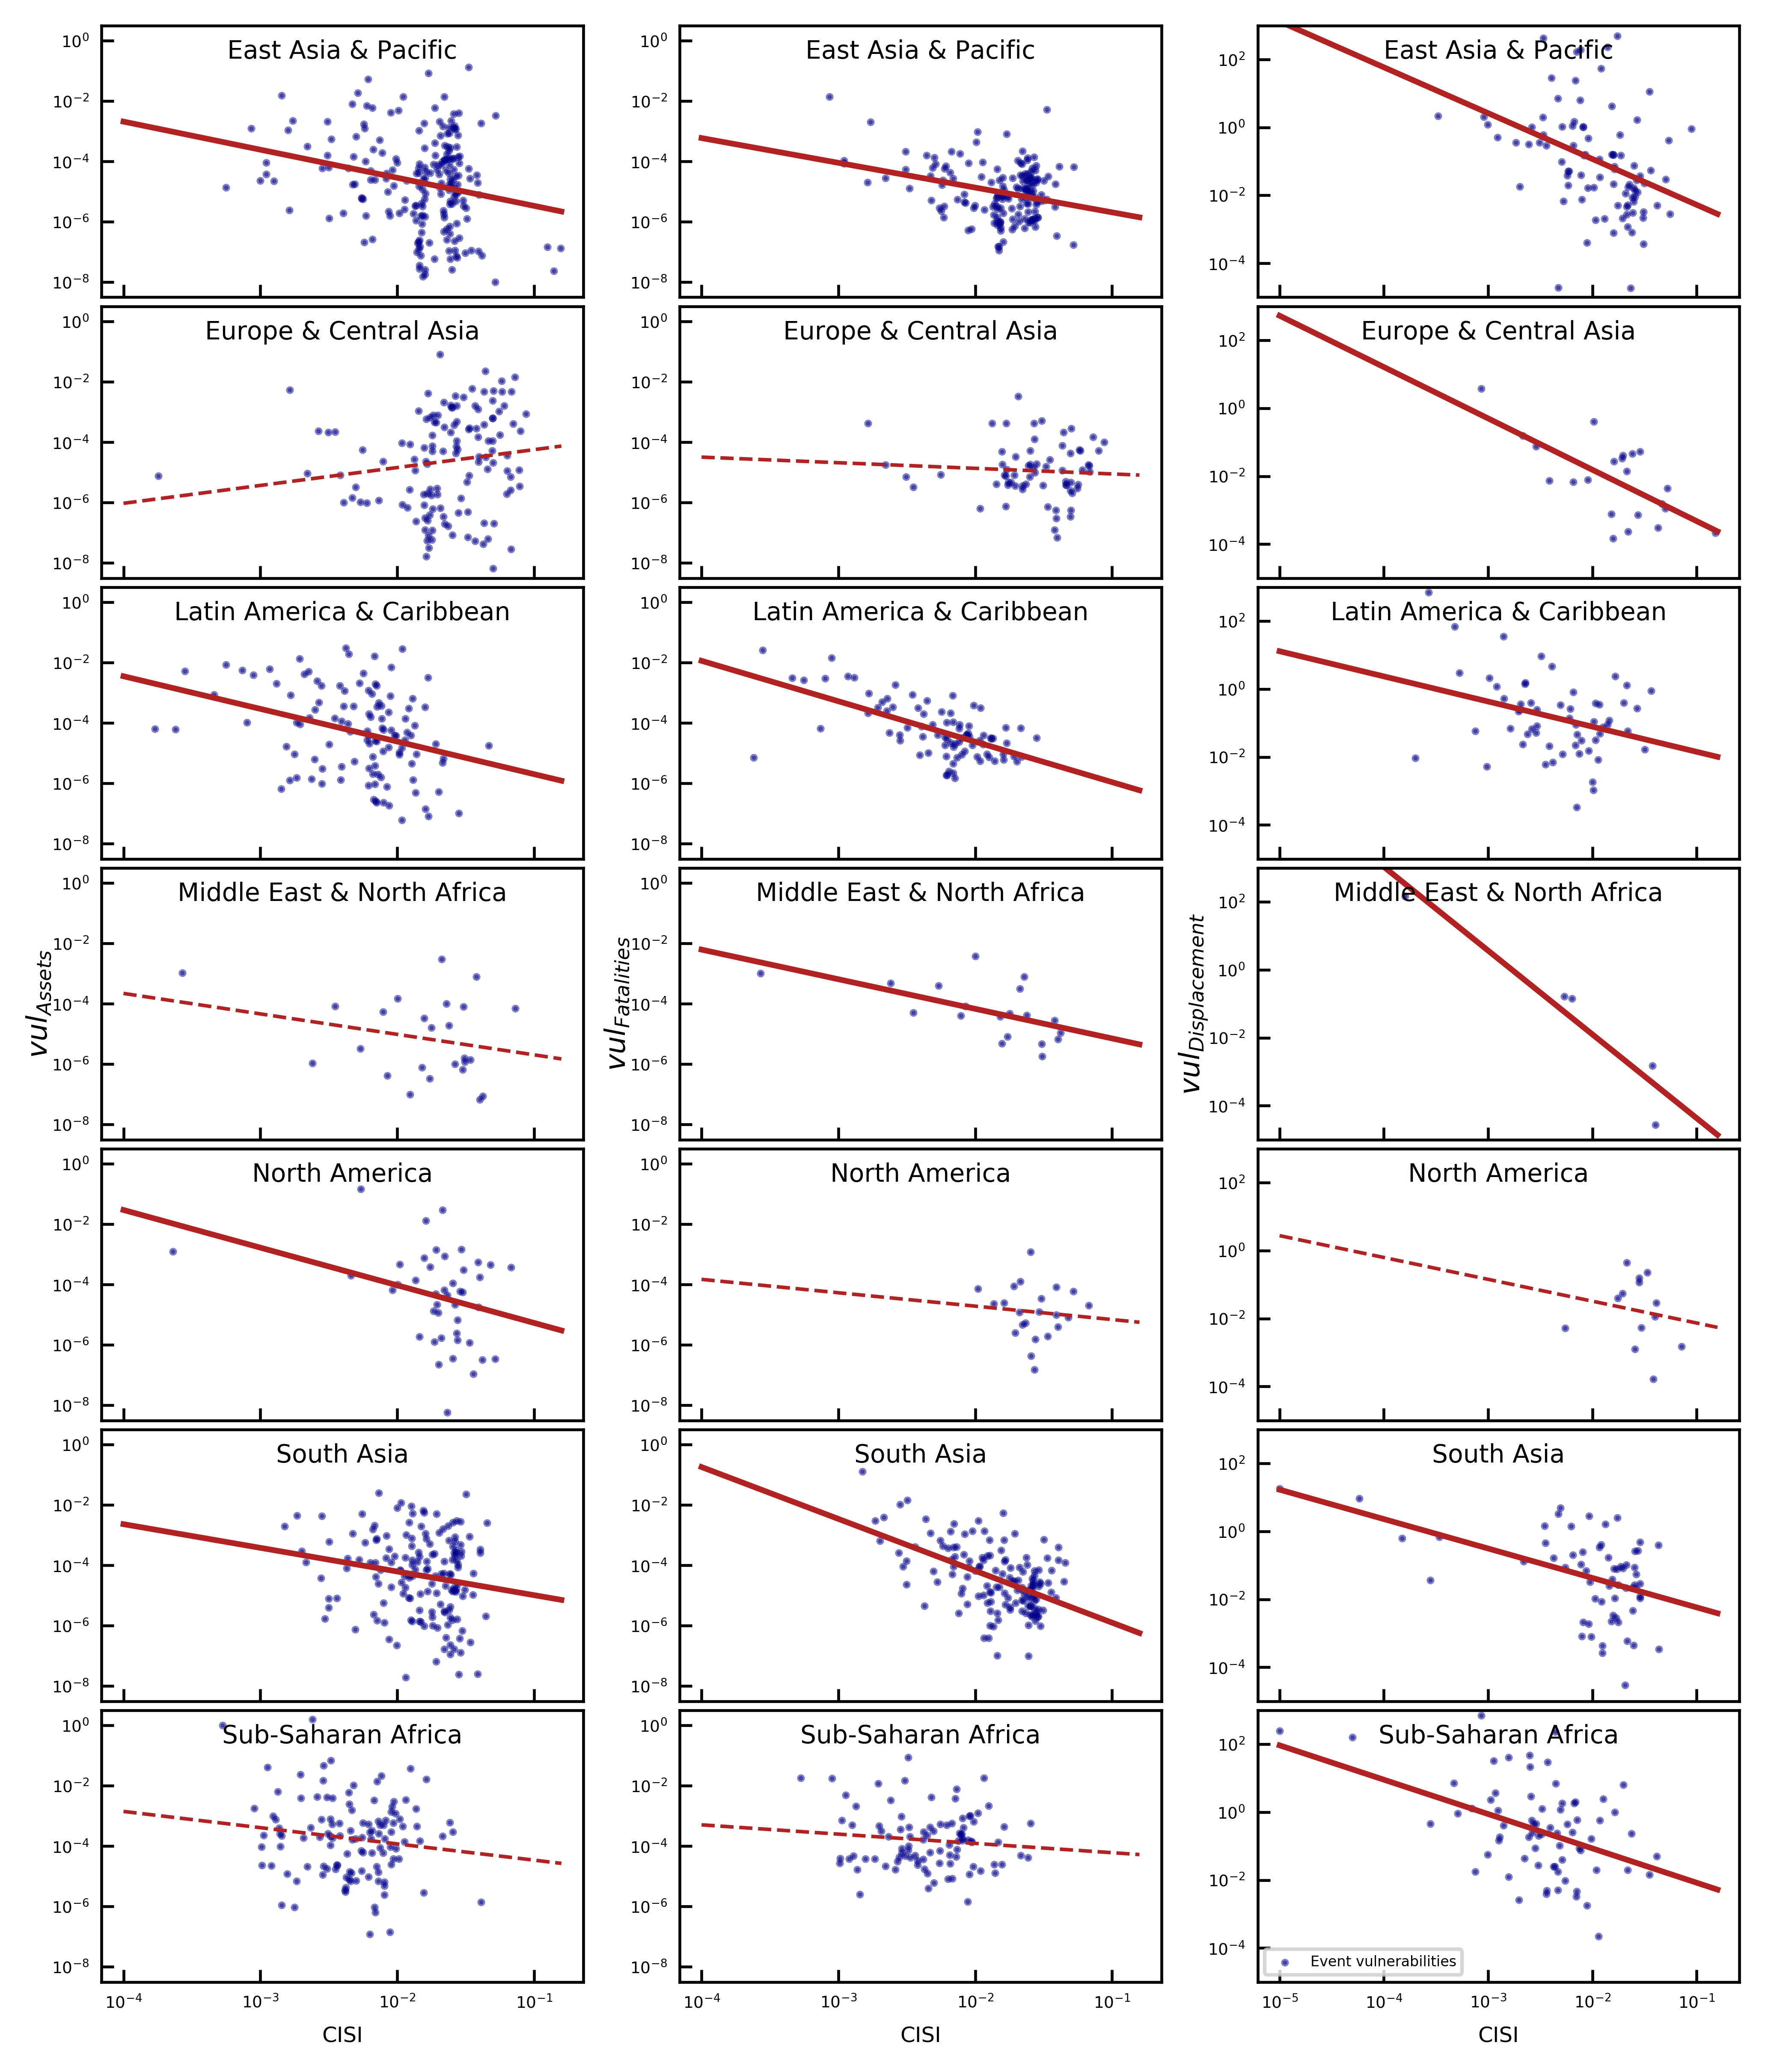

In [21]:
fig1 = plt.figure(figsize=(x_width,y_width), dpi=600)
plt.subplots_adjust(top=0.95, bottom= 0.05, left= 0.05, right=0.95, wspace=0.2, hspace=0.15)

fig1.patch.set_facecolor('white')
variables_log=['log_vul_asset', 'log_vul_fat', 'log_vul_dis']
variables=['vul_asset', 'vul_fat', 'vul_dis']

units=['Number events','Number events','Number events', 'Number events',
       'USD 2011 PPP','USD 2011 PPP', 'People', 'People']
titles=['NATCAT events since 1980','EMDAT events since 1980','NATCAT events since 2000',
        'EMDAT events since 2000', 'NATCAT Damage','EMDAT Damage', 'NATCAT Fatalities','EMDAT Fatalities']
gs = fig1.add_gridspec(28, 3)
trends=pd.DataFrame()
v=0
ending=['NATCAT', 'EMDAT']
names=['Damage', 'Fatalities','Displacement']



for i,row in enumerate([0,4,8,12,16,20,24]):
    print(regions[i])
    for col in [0,1,2]:
        temp_results=pd.DataFrame()
        f3_ax1 = fig1.add_subplot(gs[row: row+4, col:col+1])
        if col < 2:
            

            f3_ax1.scatter(natcat_matched.loc[natcat_matched['region']==regions[i],'log_CISI_global_affected_mean'],
                           natcat_matched.loc[natcat_matched['region']==regions[i],variables_log[col]],
                            alpha=0.5, s=1.4, color='darkblue')
            
            df1=pd.DataFrame()

            df1['day_plot']=natcat_matched.loc[natcat_matched['region']==regions[i],'log_CISI_global_affected_mean']
            df1['const']=1

            reg1 = sm.OLS(endog=natcat_matched.loc[natcat_matched['region']==regions[i],variables_log[col]], exog=df1[['const','day_plot']], 
                missing='drop')

            results = reg1.fit()
            y_ax=results.params[0]
            slope= results.params[1]
            y = slope*np.arange(-4,-0.7,0.1) + y_ax

            r=results.pvalues[1]
            if r <0.05:
                f3_ax1.plot(np.arange(-4,-0.7,0.1), y, c ='firebrick', linewidth=1.6)
            else:
                f3_ax1.plot(np.arange(-4,-0.7,0.1), y, c ='firebrick', linewidth=1., linestyle='--')
            
            if r<0.001:
        
                sl="%.3f" % round(slope,3)+'***'
            elif r<0.01:
                sl="%.3f" % round(slope,3)+'**'
            elif r<0.05:
                sl="%.3f" % round(slope,3)+'*'
            else:
                sl="%.3f" % round(slope,3)
            

            f3_ax1.set_ylim([-8.5,0.5])
            if i==3 and col==0:
                f3_ax1.set_ylabel('$vul_{Assets}$', fontsize=8, labelpad=-0.5)
            if i==3 and col==1:
                f3_ax1.set_ylabel('$vul_{Fatalities}$', fontsize=8, labelpad=-0.5)
            f3_ax1.set_yticks([-8,-6,-4,-2,0])
            f3_ax1.set_yticklabels(['$10^{-8}$','$10^{-6}$','$10^{-4}$','$10^{-2}$','$10^{0}$'], fontsize=5)
            f3_ax1.set_xticks([-4,-3,-2,-1])
            f3_ax1.set_xticklabels(['$10^{-4}$','$10^{-3}$','$10^{-2}$','$10^{-1}$'], fontsize=5.5)

        else:

            f3_ax1.scatter(idmc_matched.loc[idmc_matched['region']==regions[i],'log_CISI_global_affected_mean'],
                           idmc_matched.loc[idmc_matched['region']==regions[i],variables_log[col]],
                            alpha=0.5, s=1.4,color='darkblue', label='Event vulnerabilities')

            df1=pd.DataFrame()
            df1['day_plot']=idmc_matched.loc[idmc_matched['region']==regions[i],'log_CISI_global_affected_mean']
            df1['const']=1

            reg1 = sm.OLS(endog=idmc_matched.loc[idmc_matched['region']==regions[i],variables_log[col]], exog=df1[['const','day_plot']], 
                missing='drop')

            results = reg1.fit()
            y_ax=results.params[0]
            slope= results.params[1]

            y = slope*np.arange(-5,-0.7,0.1)  + y_ax
            r=results.pvalues[1]
            
            
            if r<0.001:
        
                sl="%.3f" % round(slope,3)+'***'
            elif r<0.01:
                sl="%.3f" % round(slope,3)+'**'
            elif r<0.05:
                sl="%.3f" % round(slope,3)+'*'
            else:
                sl="%.3f" % round(slope,3)
            
            if r <0.05:
                f3_ax1.plot(np.arange(-5,-0.7,0.1) , y, c ='firebrick', linewidth=1.6)
            else:
                f3_ax1.plot(np.arange(-5,-0.7,0.1) , y, c ='firebrick', linewidth=1., linestyle='--')

            
            if i==3:
                f3_ax1.set_ylabel('$vul_{Displacement}$', fontsize=8, labelpad=-0.5)
            if i==6:
                f3_ax1.legend(fontsize=4, loc='lower left')
            f3_ax1.set_ylim([-5, 3])
            f3_ax1.set_yticks([-4,-2,0,2])
            f3_ax1.set_yticklabels(['$10^{-4}$','$10^{-2}$','$10^{0}$','$10^{2}$'], fontsize=5)
            f3_ax1.set_xticks([-5,-4,-3,-2,-1])
            f3_ax1.set_xticklabels(['$10^{-5}$','$10^{-4}$','$10^{-3}$','$10^{-2}$','$10^{-1}$'], fontsize=5.5)
            
        f3_ax1.set_title(regions[i], fontsize=7, y=0.8)
        f3_ax1.set_xlabel('CISI', fontsize=6)
        #f3_ax1.set_xlim([1999,2020])
        #f3_ax1.set_xticks([2000,2004,2008,2012,2016])
        f3_ax1.tick_params(axis='both', which='major', labelsize=4.5,direction='in')
plt.savefig('/home/insauer/projects/submission_vul_sat/supplementary_figures/SI_trends_regions_natcat_cisi.png')


###  2.2 Regional vulnerabilities EM-DAT

In [77]:
cm = 1/2.54
x_width= 17.5*cm
y_width= 21.5*cm
y_width

8.464566929133857

East Asia & Pacific
Europe & Central Asia
Latin America & Caribbean
Middle East & North Africa
North America
South Asia


/home/insauer/anaconda3/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1620: RuntimeWarning: divide by zero encountered in double_scalars
  return np.dot(wresid, wresid) / self.df_resid


Sub-Saharan Africa
                                      Mann-Kendall Mann-Kendall annual mean  \
East Asia & Pacific Damage               3.035E-06               2.033E-03*   
East Asia & Pacific Fatalities           3.300E-07                3.344E-04   
Europe & Central Asia Damage             5.819E-06               -1.526E-03   
Europe & Central Asia Fatalities         5.306E-07               -6.366E-06   
Latin America & Caribbean Damage         0.000E+00                3.441E-04   
Latin America & Caribbean Fatalities    2.261E-06*                2.276E-04   
Middle East & North Africa Damage       -1.714E-04               -2.307E-02   
Middle East & North Africa Fatalities    6.613E-06                1.808E-03   
North America Damage                    -9.876E-05               -7.011E-05   
North America Fatalities                -5.112E-06               -1.918E-05   
South Asia Damage                       1.586E-05*                2.735E-04   
South Asia Fatalities            

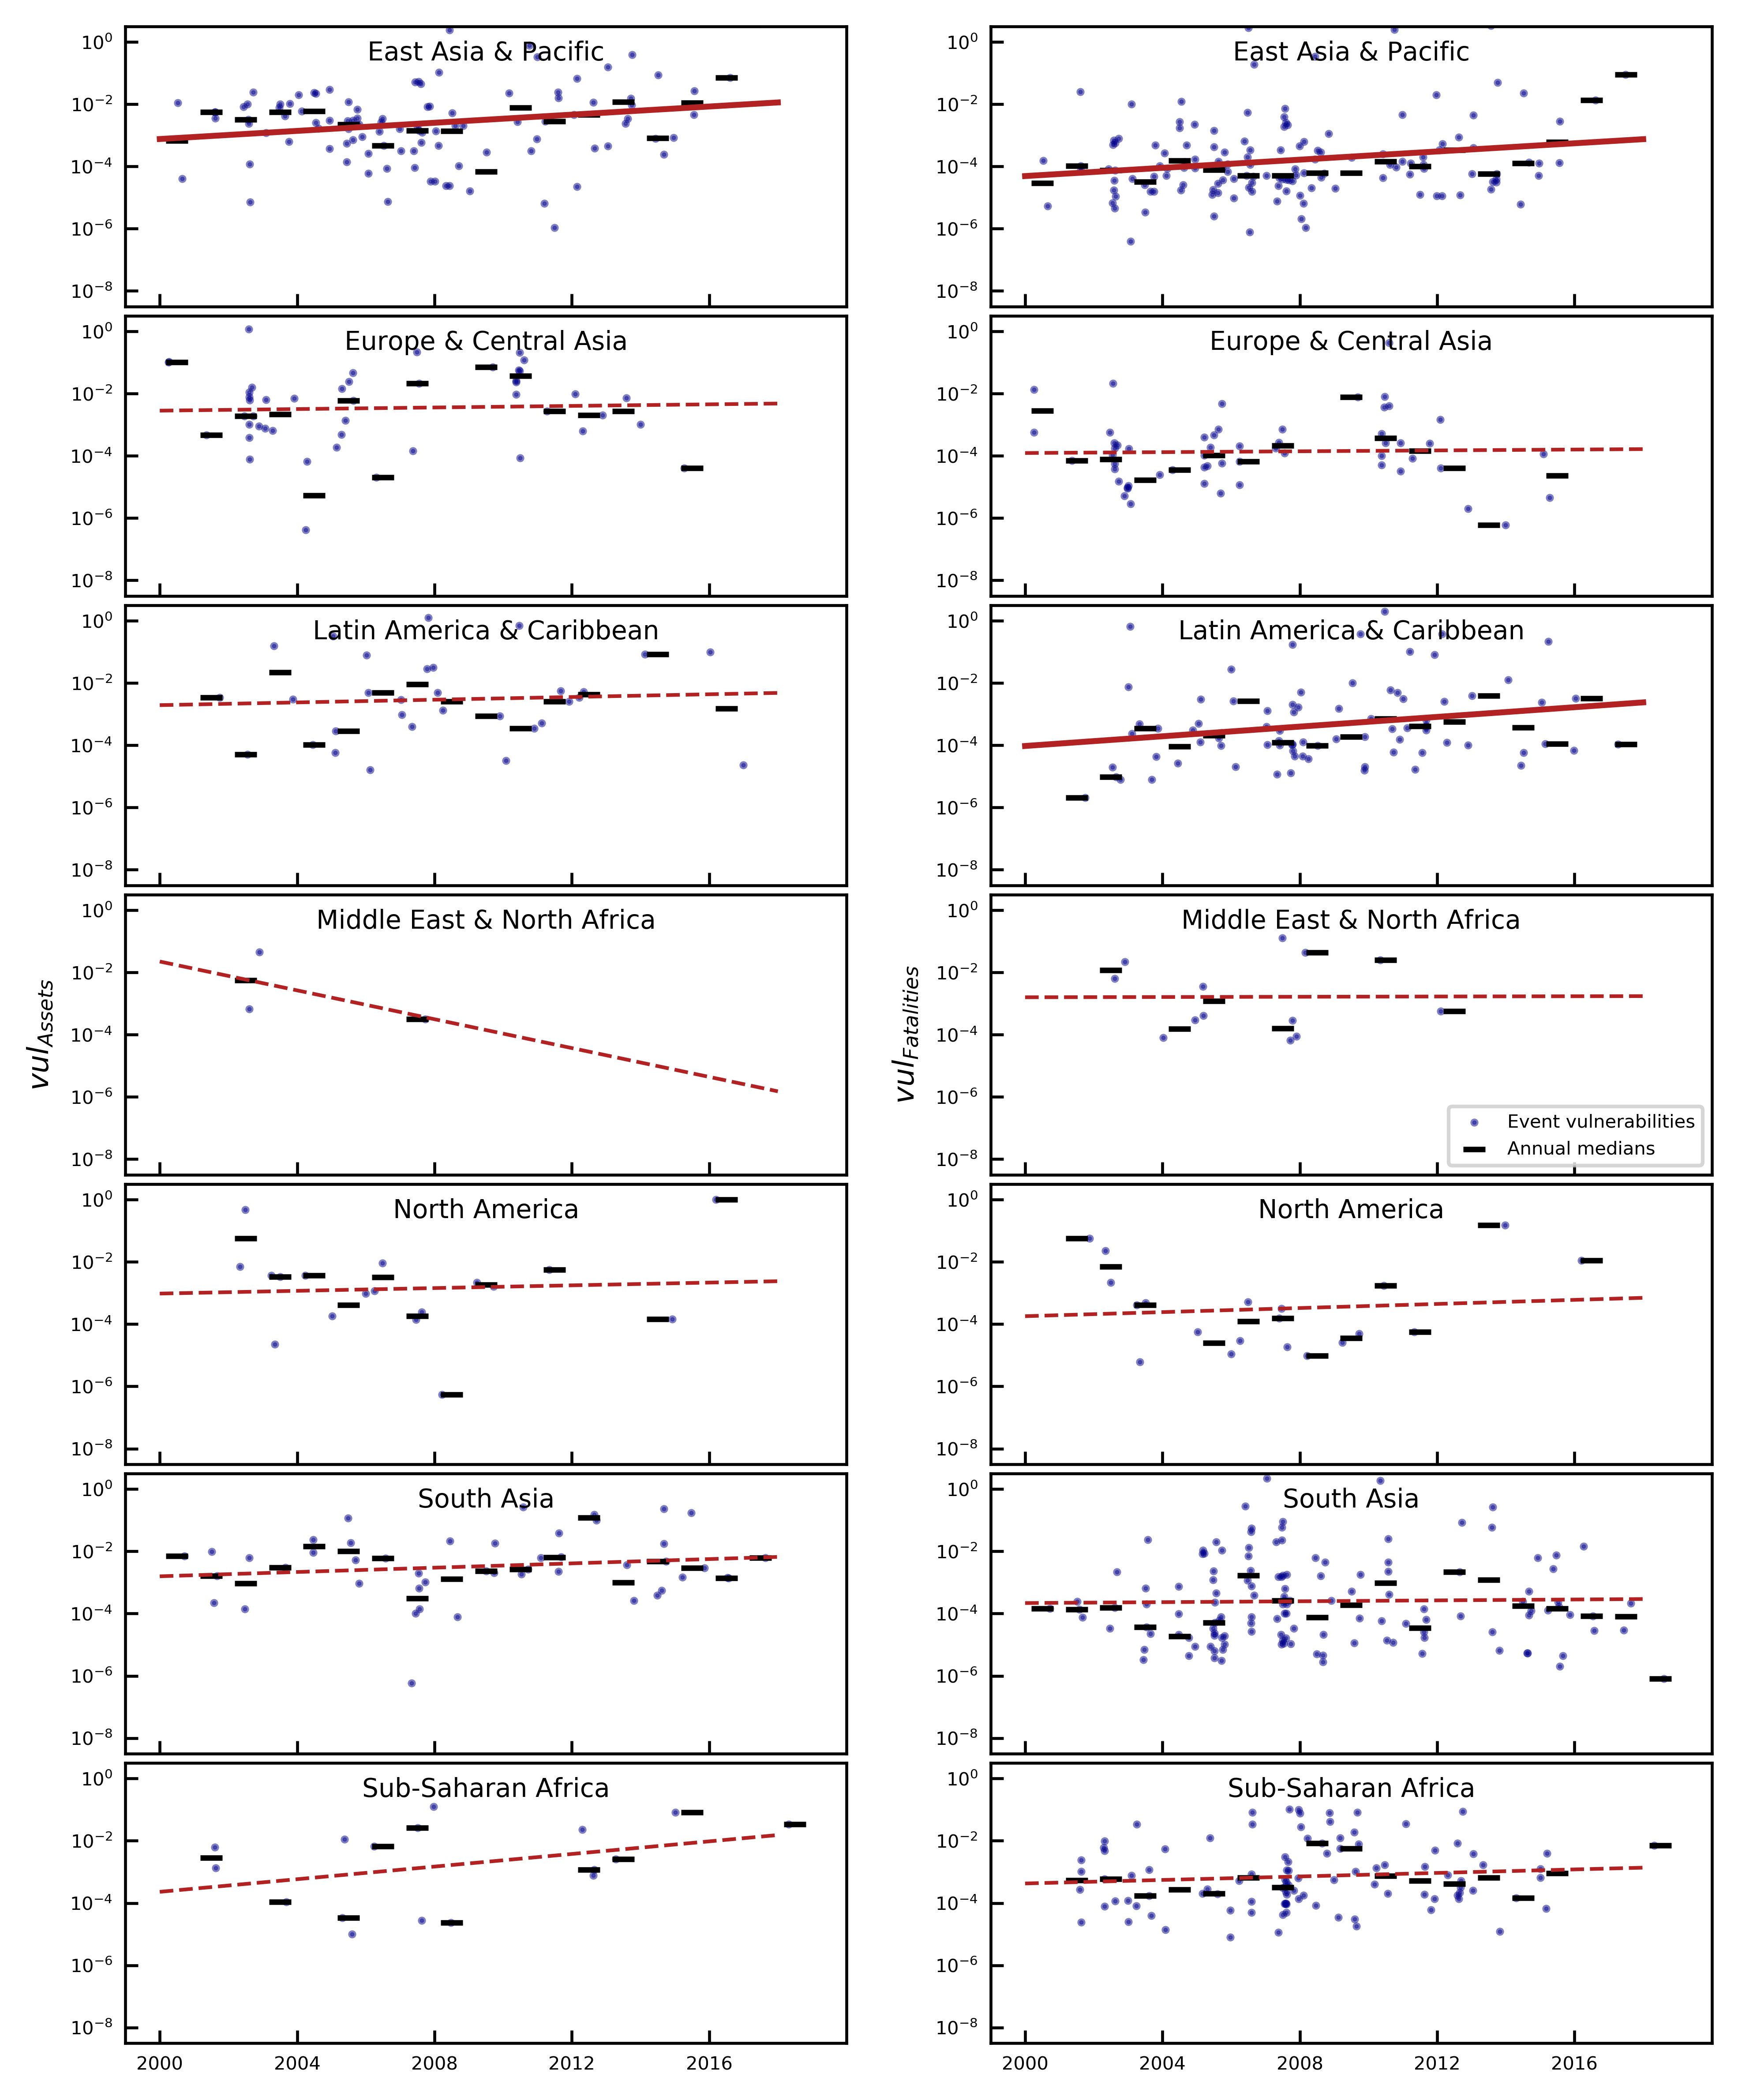

In [78]:
fig1 = plt.figure(figsize=(x_width,y_width), dpi=600)
plt.subplots_adjust(top=0.95, bottom= 0.05, left= 0.08, right=0.95, wspace=0.2, hspace=0.15)

fig1.patch.set_facecolor('white')
variables_log=['log_vul_asset', 'log_vul_fat', 'log_vul_dis']
variables=['vul_asset', 'vul_fat', 'vul_dis']

units=['Number events','Number events','Number events', 'Number events',
       'USD 2011 PPP','USD 2011 PPP', 'People', 'People']
titles=['NATCAT events since 1980','EMDAT events since 1980','NATCAT events since 2000',
        'EMDAT events since 2000', 'NATCAT Damage','EMDAT Damage', 'NATCAT Fatalities','EMDAT Fatalities']
gs = fig1.add_gridspec(28, 2)
trends=pd.DataFrame()
v=0
ending=['NATCAT', 'EMDAT']

trends=pd.DataFrame()

for i,row in enumerate([0,4,8,12,16,20,24]):
    print(regions[i])
    for col in [0,1]:
        temp_results=pd.DataFrame()
        f3_ax1 = fig1.add_subplot(gs[row: row+4, col:col+1])
        if col < 2:
            

            yearly_means=emdat_matched.loc[emdat_matched['region']==regions[i]].groupby('year').mean()
            yearly_std=emdat_matched.loc[emdat_matched['region']==regions[i]].groupby('year').std()
            yearly_medians=emdat_matched.loc[emdat_matched['region']==regions[i]].groupby('year').median()


            f3_ax1.scatter(emdat_matched.loc[emdat_matched['region']==regions[i],'day_plot'],
                           emdat_matched.loc[emdat_matched['region']==regions[i],variables_log[col]],
                            alpha=0.5, s=1.4, color='darkblue', label= 'Event vulnerabilities')
            
            f3_ax1.scatter(yearly_medians.index+0.5, yearly_medians[variables_log[col]],
                             marker='_',color='k', label= 'Annual medians')


            sig = mk.original_test(emdat_matched.loc[emdat_matched['region']==regions[i],variables[col]], alpha=0.1)
            sig_year= mk.original_test(yearly_means[variables[col]], alpha=0.1)
            
            if sig.p<0.001:

                mk_slope="%.3E" % sig.slope+'***'
            elif sig.p<0.01:
                mk_slope="%.3E" % sig.slope+'**'
            elif sig.p<0.05:
                mk_slope="%.3E" % sig.slope+'*'
            else:
                mk_slope="%.3E" % sig.slope
            
            if sig_year.p<0.001:

                mk_slope_ann="%.3E" % sig_year.slope+'***'
            elif sig_year.p<0.01:
                mk_slope_ann="%.3E" % sig_year.slope+'**'
            elif sig_year.p<0.05:
                mk_slope_ann="%.3E" % sig_year.slope+'*'
            else:
                mk_slope_ann="%.3E" % sig_year.slope
            
            temp_results.loc[regions[i] + ' '+names[col], 'Mann-Kendall']=mk_slope
            temp_results.loc[regions[i] + ' '+names[col], 'Mann-Kendall annual mean']=mk_slope_ann
            
            df1=pd.DataFrame()
            df1['day_plot']=emdat_matched.loc[emdat_matched['region']==regions[i],'day_plot']
            df1['const']=1

            reg1 = sm.OLS(endog=emdat_matched.loc[emdat_matched['region']==regions[i],variables_log[col]], exog=df1[['const','day_plot']], 
                missing='drop')

            results = reg1.fit()
            y_ax=results.params[0]
            slope= results.params[1]
            y = slope*np.arange(2000,2019) + y_ax
            r=results.pvalues[1]
            
            if r<0.001:
        
                sl="%.3f" % round(slope,3)+'***'
            elif r<0.01:
                sl="%.3f" % round(slope,3)+'**'
            elif r<0.05:
                sl="%.3f" % round(slope,3)+'*'
            else:
                sl="%.3f" % round(slope,3)

            
            if r <0.05:
                f3_ax1.plot(np.arange(2000,2019), y, c ='firebrick', linewidth=1.6)
            else:
                f3_ax1.plot(np.arange(2000,2019), y, c ='firebrick', linewidth=1., linestyle='--')

            
            df1=pd.DataFrame()
            df1['day_plot']=yearly_means.index
            df1['const']=1
            reg1 = sm.OLS(endog=yearly_means.reset_index()[variables_log[col]], exog=df1[['const','day_plot']], 
                missing='drop')

            results = reg1.fit()
            y_ax=results.params[0]
            slope= results.params[1]
            y = slope*np.arange(2000,2019) + y_ax

            r_year=results.pvalues[1]
            
            if r_year<0.001:
        
                sl_year="%.3f" % round(slope,3)+'***'
            elif r_year<0.01:
                sl_year="%.3f" % round(slope,3)+'**'
            elif r_year<0.05:
                sl_year="%.3f" % round(slope,3)+'*'
            else:
                sl_year="%.3f" % round(slope,3)
            #f3_ax1.plot(np.arange(2000,2019), y, c =lgr, linewidth=0.6)

            f3_ax1.set_ylim([-8.5,0.5])
            if i==3 and col==0:
                f3_ax1.set_ylabel('$vul_{Assets}$', fontsize=8)
            if i==3 and col==1:
                f3_ax1.set_ylabel('$vul_{Fatalities}$', fontsize=8)
                f3_ax1.legend(fontsize=5, loc='lower right')
            temp_results.loc[regions[i] + ' '+names[col], 'OLS']=sl
            temp_results.loc[regions[i] + ' '+names[col], 'OLS annual mean']=sl_year
            trends=trends.append(temp_results,ignore_index=False)
            f3_ax1.set_yticks([-8,-6,-4,-2,0])
            f3_ax1.set_yticklabels(['$10^{-8}$','$10^{-6}$','$10^{-4}$','$10^{-2}$','$10^{0}$'], fontsize=5)

            
        f3_ax1.set_title(regions[i], fontsize=7, y=0.8)
        f3_ax1.set_xlim([1999,2020])
        f3_ax1.set_xticks([2000,2004,2008,2012,2016])
        f3_ax1.tick_params(axis='both', which='major', labelsize=5,direction='in')
plt.savefig('/home/insauer/projects/submission_vul_sat/supplementary_figures/SI_trends_regions_emdat.png')
print(trends)
trends.to_csv('/home/insauer/projects/submission_vul_sat/supplementary_tables/regional_trends_emdat.csv')

## 3 Trends in vulnerabilities for income groups

### 3.1 Vulnerabilities for income groups (Main)

In [79]:
cm = 1/2.54
x_width= 18.0*cm
y_width= 14.0*cm
y_width

5.511811023622046

In [80]:
regions=['High income', 'Upper middle income', 'Lower middle income', 'Low income']

High income
OLS 0.7534511567249379
Upper middle income
OLS 0.3849491517296043
Lower middle income
OLS 0.9159908776861391
Low income
OLS 0.2854559879156276
                                 Mann-Kendall Mann-Kendall annual mean  \
High income Damage                 -8.200E-09               -1.128E-05   
High income Fatalities              0.000E+00               -1.338E-07   
High income Displacement            2.650E-06                1.111E-03   
Upper middle income Damage         -2.398E-09                1.259E-06   
Upper middle income Fatalities      0.000E+00                8.930E-08   
Upper middle income Displacement   -4.433E-04                2.021E+00   
Lower middle income Damage          1.194E-08                2.719E-06   
Lower middle income Fatalities      0.000E+00                1.211E-05   
Lower middle income Displacement    6.205E-06                1.193E-01   
Low income Damage                  -9.963E-07               -2.409E-05   
Low income Fatalities          

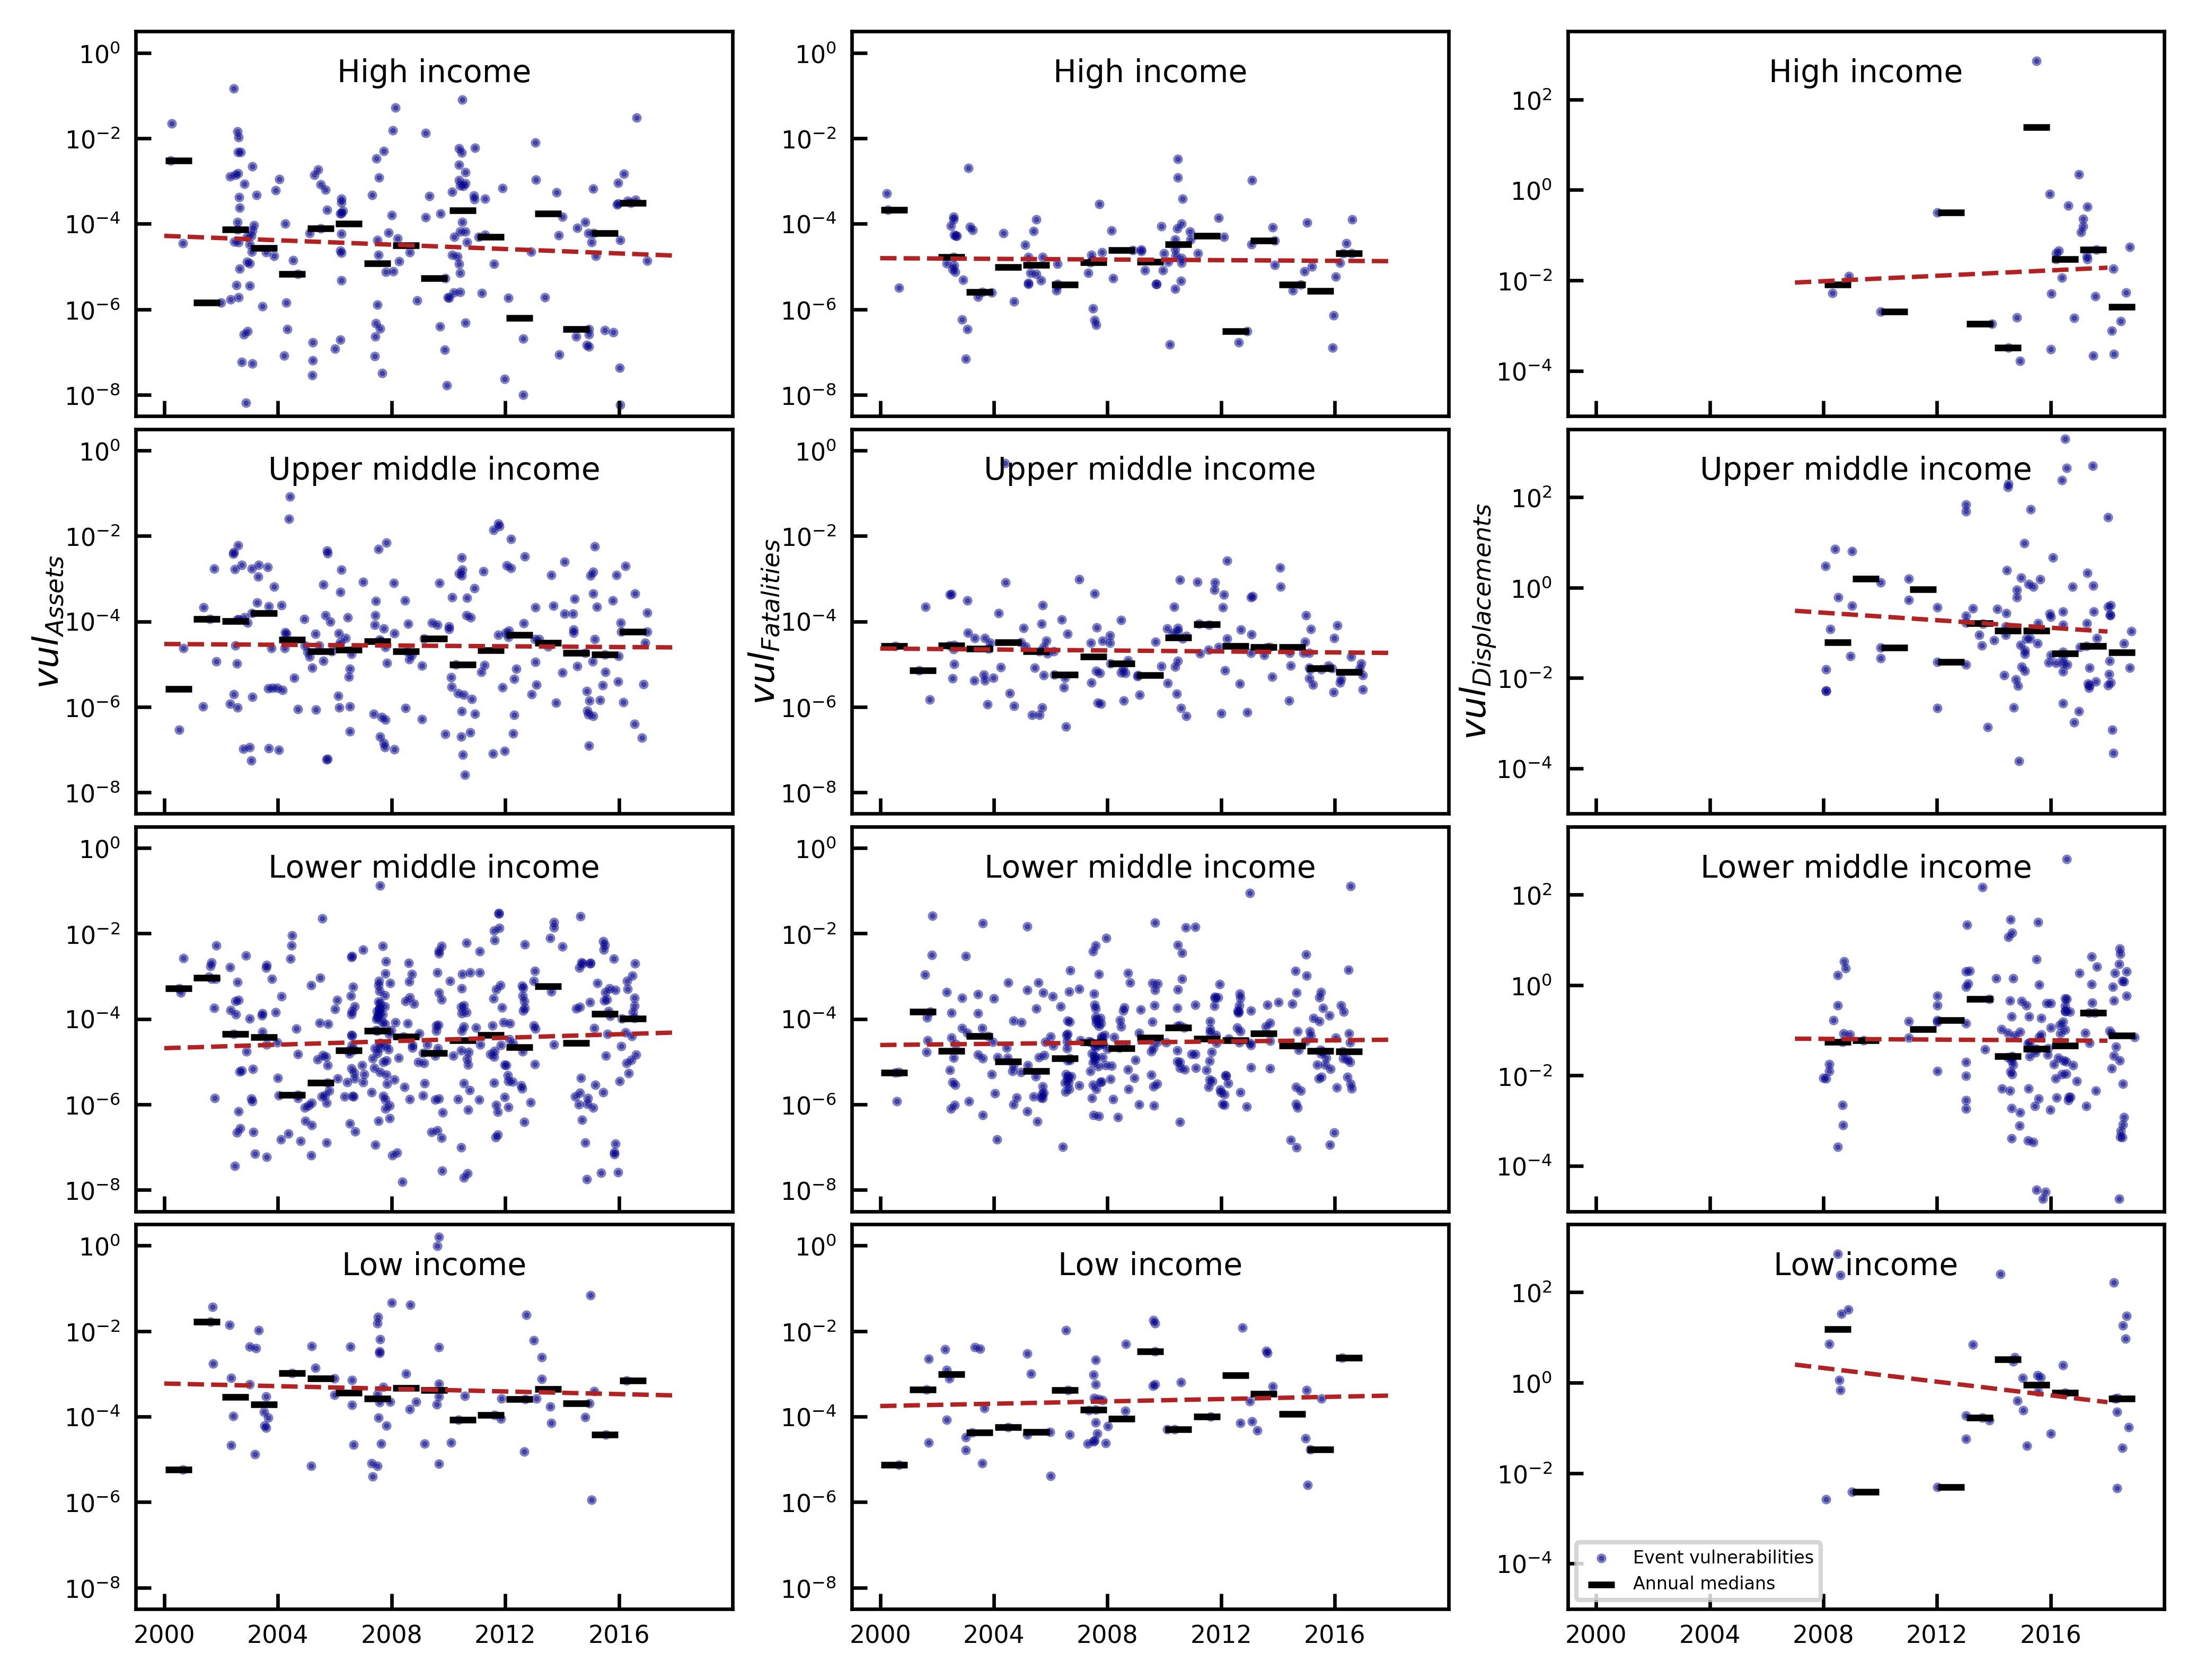

In [82]:
fig1 = plt.figure(figsize=(x_width,y_width), dpi=600)
plt.subplots_adjust(top=0.95, bottom= 0.05, left= 0.05, right=0.95, wspace=0.2, hspace=0.15)

fig1.patch.set_facecolor('white')
variables_log=['log_vul_asset', 'log_vul_fat', 'log_vul_dis']
variables=['vul_asset', 'vul_fat', 'vul_dis']

units=['Number events','Number events','Number events', 'Number events',
       'USD 2011 PPP','USD 2011 PPP', 'People', 'People']
titles=['NATCAT events since 1980','EMDAT events since 1980','NATCAT events since 2000',
        'EMDAT events since 2000', 'NATCAT Damage','EMDAT Damage', 'NATCAT Fatalities','EMDAT Fatalities']
gs = fig1.add_gridspec(16, 3)
trends=pd.DataFrame()
v=0
ending=['NATCAT', 'EMDAT']

for i,row in enumerate([0,4,8,12]):
    print(regions[i])
    for col in [0,1,2]:
        f3_ax1 = fig1.add_subplot(gs[row: row+4, col:col+1])
        temp_results=pd.DataFrame()
        if col < 2:
            

            yearly_means=natcat_matched.loc[natcat_matched['income_group']==regions[i]].groupby('year').mean()
            yearly_std=natcat_matched.loc[natcat_matched['income_group']==regions[i]].groupby('year').std()
            yearly_medians=natcat_matched.loc[natcat_matched['income_group']==regions[i]].groupby('year').median()


            f3_ax1.scatter(natcat_matched.loc[natcat_matched['income_group']==regions[i],'day_plot'],
                           natcat_matched.loc[natcat_matched['income_group']==regions[i],variables_log[col]],
                            alpha=0.5, s=1.4, color='darkblue')
            
            f3_ax1.scatter(yearly_medians.index+0.5, yearly_medians[variables_log[col]],
                             marker='_',color='k')

            sig = mk.original_test(natcat_matched.loc[natcat_matched['income_group']==regions[i],variables[col]], alpha=0.1)
            sig_year= mk.original_test(yearly_means[variables[col]], alpha=0.1)
            if sig.p<0.001:

                mk_slope="%.3E" % sig.slope+'***'
            elif sig.p<0.01:
                mk_slope="%.3E" % sig.slope+'**'
            elif sig.p<0.05:
                mk_slope="%.3E" % sig.slope+'*'
            else:
                mk_slope="%.3E" % sig.slope
            
            if sig_year.p<0.001:

                mk_slope_ann="%.3E" % sig_year.slope+'***'
            elif sig_year.p<0.01:
                mk_slope_ann="%.3E" % sig_year.slope+'**'
            elif sig_year.p<0.05:
                mk_slope_ann="%.3E" % sig_year.slope+'*'
            else:
                mk_slope_ann="%.3E" % sig_year.slope
            
            temp_results.loc[regions[i] + ' '+names[col], 'Mann-Kendall']=mk_slope
            temp_results.loc[regions[i] + ' '+names[col], 'Mann-Kendall annual mean']=mk_slope_ann
            df1=pd.DataFrame()
            df1['day_plot']=natcat_matched.loc[natcat_matched['income_group']==regions[i],'day_plot']
            df1['const']=1

            reg1 = sm.OLS(endog=natcat_matched.loc[natcat_matched['income_group']==regions[i],variables_log[col]], exog=df1[['const','day_plot']], 
                missing='drop')

            results = reg1.fit()
            y_ax=results.params[0]
            slope= results.params[1]
            y = slope*np.arange(2000,2019) + y_ax

            r=results.pvalues[1]
            
            if r<0.001:
        
                sl="%.3f" % round(slope,3)+'***'
            elif r<0.01:
                sl="%.3f" % round(slope,3)+'**'
            elif r<0.05:
                sl="%.3f" % round(slope,3)+'*'
            else:
                sl="%.3f" % round(slope,3)
                
                
            if r <0.05:
                
                f3_ax1.plot(np.arange(2000,2019), y, c ='firebrick', linewidth=1.6)
            else:
                f3_ax1.plot(np.arange(2000,2019), y, c ='firebrick', linewidth=1., linestyle='--')

            
            df1=pd.DataFrame()
            df1['day_plot']=yearly_means.index
            df1['const']=1
            reg1 = sm.OLS(endog=yearly_means.reset_index()[variables_log[col]], exog=df1[['const','day_plot']], 
                missing='drop')

            results = reg1.fit()
            y_ax=results.params[0]
            slope= results.params[1]
            y = slope*np.arange(2000,2019) + y_ax

            r_year=results.pvalues[1]
            
            if r_year<0.001:
        
                sl_year="%.3f" % round(slope,3)+'***'
            elif r_year<0.01:
                sl_year="%.3f" % round(slope,3)+'**'
            elif r_year<0.05:
                sl_year="%.3f" % round(slope,3)+'*'
            else:
                sl_year="%.3f" % round(slope,3)
            #f3_ax1.plot(np.arange(2000,2019), y, c =lgr, linewidth=0.6)
            f3_ax1.set_ylim([-8.5,0.5])
            if i==1 and col==0:
                f3_ax1.set_ylabel('$vul_{Assets}$', fontsize=8, labelpad=-0.5)
            if i==1 and col==1:
                f3_ax1.set_ylabel('$vul_{Fatalities}$', fontsize=8, labelpad=-0.5)
            f3_ax1.set_yticks([-8,-6,-4,-2,0])
            temp_results.loc[regions[i] + ' '+names[col], 'OLS']=sl
            temp_results.loc[regions[i] + ' '+names[col], 'OLS annual mean']=sl_year
            trends=trends.append(temp_results,ignore_index=False)
            f3_ax1.set_yticks([-8,-6,-4,-2,0])
            f3_ax1.set_yticklabels(['$10^{-8}$','$10^{-6}$','$10^{-4}$','$10^{-2}$','$10^{0}$'], fontsize=5)
        else:
            
            yearly_means=idmc_matched.loc[idmc_matched['income_group']==regions[i]].groupby('year').mean()
            yearly_std=idmc_matched.loc[idmc_matched['income_group']==regions[i]].groupby('year').std()
            yearly_medians=idmc_matched.loc[idmc_matched['income_group']==regions[i]].groupby('year').median()
            
            f3_ax1.scatter(idmc_matched.loc[idmc_matched['income_group']==regions[i],'day_plot'],
                           idmc_matched.loc[idmc_matched['income_group']==regions[i],variables_log[col]],
                            alpha=0.5, s=1.4,color='darkblue', label='Event vulnerabilities')


            sig = mk.original_test(idmc_matched.loc[idmc_matched['income_group']==regions[i],variables[col]], alpha=0.1)
            sig_year= mk.original_test(yearly_means[variables[col]], alpha=0.1)
            if sig.p<0.001:

                mk_slope="%.3E" % sig.slope+'***'
            elif sig.p<0.01:
                mk_slope="%.3E" % sig.slope+'**'
            elif sig.p<0.05:
                mk_slope="%.3E" % sig.slope+'*'
            else:
                mk_slope="%.3E" % sig.slope
            
            if sig_year.p<0.001:

                mk_slope_ann="%.3E" % sig_year.slope+'***'
            elif sig_year.p<0.01:
                mk_slope_ann="%.3E" % sig_year.slope+'**'
            elif sig_year.p<0.05:
                mk_slope_ann="%.3E" % sig_year.slope+'*'
            else:
                mk_slope_ann="%.3E" % sig_year.slope
            
            temp_results.loc[regions[i] + ' '+names[col], 'Mann-Kendall']=mk_slope
            temp_results.loc[regions[i] + ' '+names[col], 'Mann-Kendall annual mean']=mk_slope_ann
            f3_ax1.scatter(yearly_medians.index+0.5, yearly_medians[variables_log[col]],
                             marker='_',color='k', label='Annual medians')
            df1=pd.DataFrame()
            df1['day_plot']=idmc_matched.loc[idmc_matched['income_group']==regions[i],'day_plot']
            df1['const']=1

            reg1 = sm.OLS(endog=idmc_matched.loc[idmc_matched['income_group']==regions[i],variables_log[col]], exog=df1[['const','day_plot']], 
                missing='drop')

            results = reg1.fit()
            y_ax=results.params[0]
            slope= results.params[1]
            y = slope*np.arange(2007,2019)  + y_ax
            r=results.pvalues[1]
            
            if r<0.001:
        
                sl="%.3f" % round(slope,3)+'***'
            elif r<0.01:
                sl="%.3f" % round(slope,3)+'**'
            elif r<0.05:
                sl="%.3f" % round(slope,3)+'*'
            else:
                sl="%.3f" % round(slope,3)
            print('OLS '+ str(r))
            if r<0.05:
                f3_ax1.plot(np.arange(2007,2019) , y, c ='firebrick', linewidth=1.6)
            else:
                f3_ax1.plot(np.arange(2007,2019) , y, c ='firebrick', linewidth=1., linestyle='--')

            
            df1=pd.DataFrame()
            df1['day_plot']=yearly_means.index
            df1['const']=1
            reg1 = sm.OLS(endog=yearly_means.reset_index()[variables_log[col]], exog=df1[['const','day_plot']], 
                missing='drop')

            results = reg1.fit()
            y_ax=results.params[0]
            slope= results.params[1]
            y = slope*np.arange(2007,2019) + y_ax

            r_year=results.pvalues[1]
            
            if r_year<0.001:
        
                sl_year="%.3f" % round(slope,3)+'***'
            elif r_year<0.01:
                sl_year="%.3f" % round(slope,3)+'**'
            elif r_year<0.05:
                sl_year="%.3f" % round(slope,3)+'*'
            else:
                sl_year="%.3f" % round(slope,3)
            #f3_ax1.plot(np.arange(2007,2019), y, c =lgr, linewidth=0.6, label='trend yearly means')

            f3_ax1.set_ylim([-5,3.5])
            f3_ax1.set_yticks([-4,-2,0,2])
            
            if i==1:
                f3_ax1.set_ylabel('$vul_{Displacements}$', fontsize=8, labelpad=-0.5)
            if i==3:
                f3_ax1.legend(fontsize=4, loc='lower left')
            temp_results.loc[regions[i] + ' '+names[col], 'OLS']=sl
            temp_results.loc[regions[i] + ' '+names[col], 'OLS annual mean']=sl_year
            trends=trends.append(temp_results,ignore_index=False)
            f3_ax1.set_yticks([-4,-2,0,2])
            f3_ax1.set_yticklabels(['$10^{-4}$','$10^{-2}$','$10^{0}$','$10^{2}$'], fontsize=5)
        f3_ax1.set_title(regions[i], fontsize=7, y=0.8)
        f3_ax1.set_xlim([1999,2020])
        f3_ax1.set_xticks([2000,2004,2008,2012,2016])
        f3_ax1.tick_params(axis='both', which='major', labelsize=5.5,direction='in')
plt.savefig('/home/insauer/projects/submission_vul_sat/supplementary_figures/SI_trends_ig_natcat.png')
print(trends)
trends.to_csv('/home/insauer/projects/submission_vul_sat/supplementary_tables/income_trends_nacat.csv')

### 3.2 Vulnerabilities for income groups EM-DAT

High income
Upper middle income
Lower middle income
Low income
                               Mann-Kendall Mann-Kendall annual mean      OLS  \
High income Damage                3.315E-05               -6.205E-04    0.046   
High income Fatalities            5.751E-07               -4.933E-05    0.042   
Upper middle income Damage        7.284E-06                2.898E-03   0.069*   
Upper middle income Fatalities  9.152E-07**                8.674E-04  0.076**   
Lower middle income Damage        1.781E-06                6.831E-04    0.028   
Lower middle income Fatalities    5.644E-08                9.161E-05    0.012   
Low income Damage                 0.000E+00                1.672E-03    0.088   
Low income Fatalities             9.251E-06                1.228E-03    0.053   

                               OLS annual mean  
High income Damage                       0.037  
High income Fatalities                  -0.013  
Upper middle income Damage              0.093*  
Upper middl

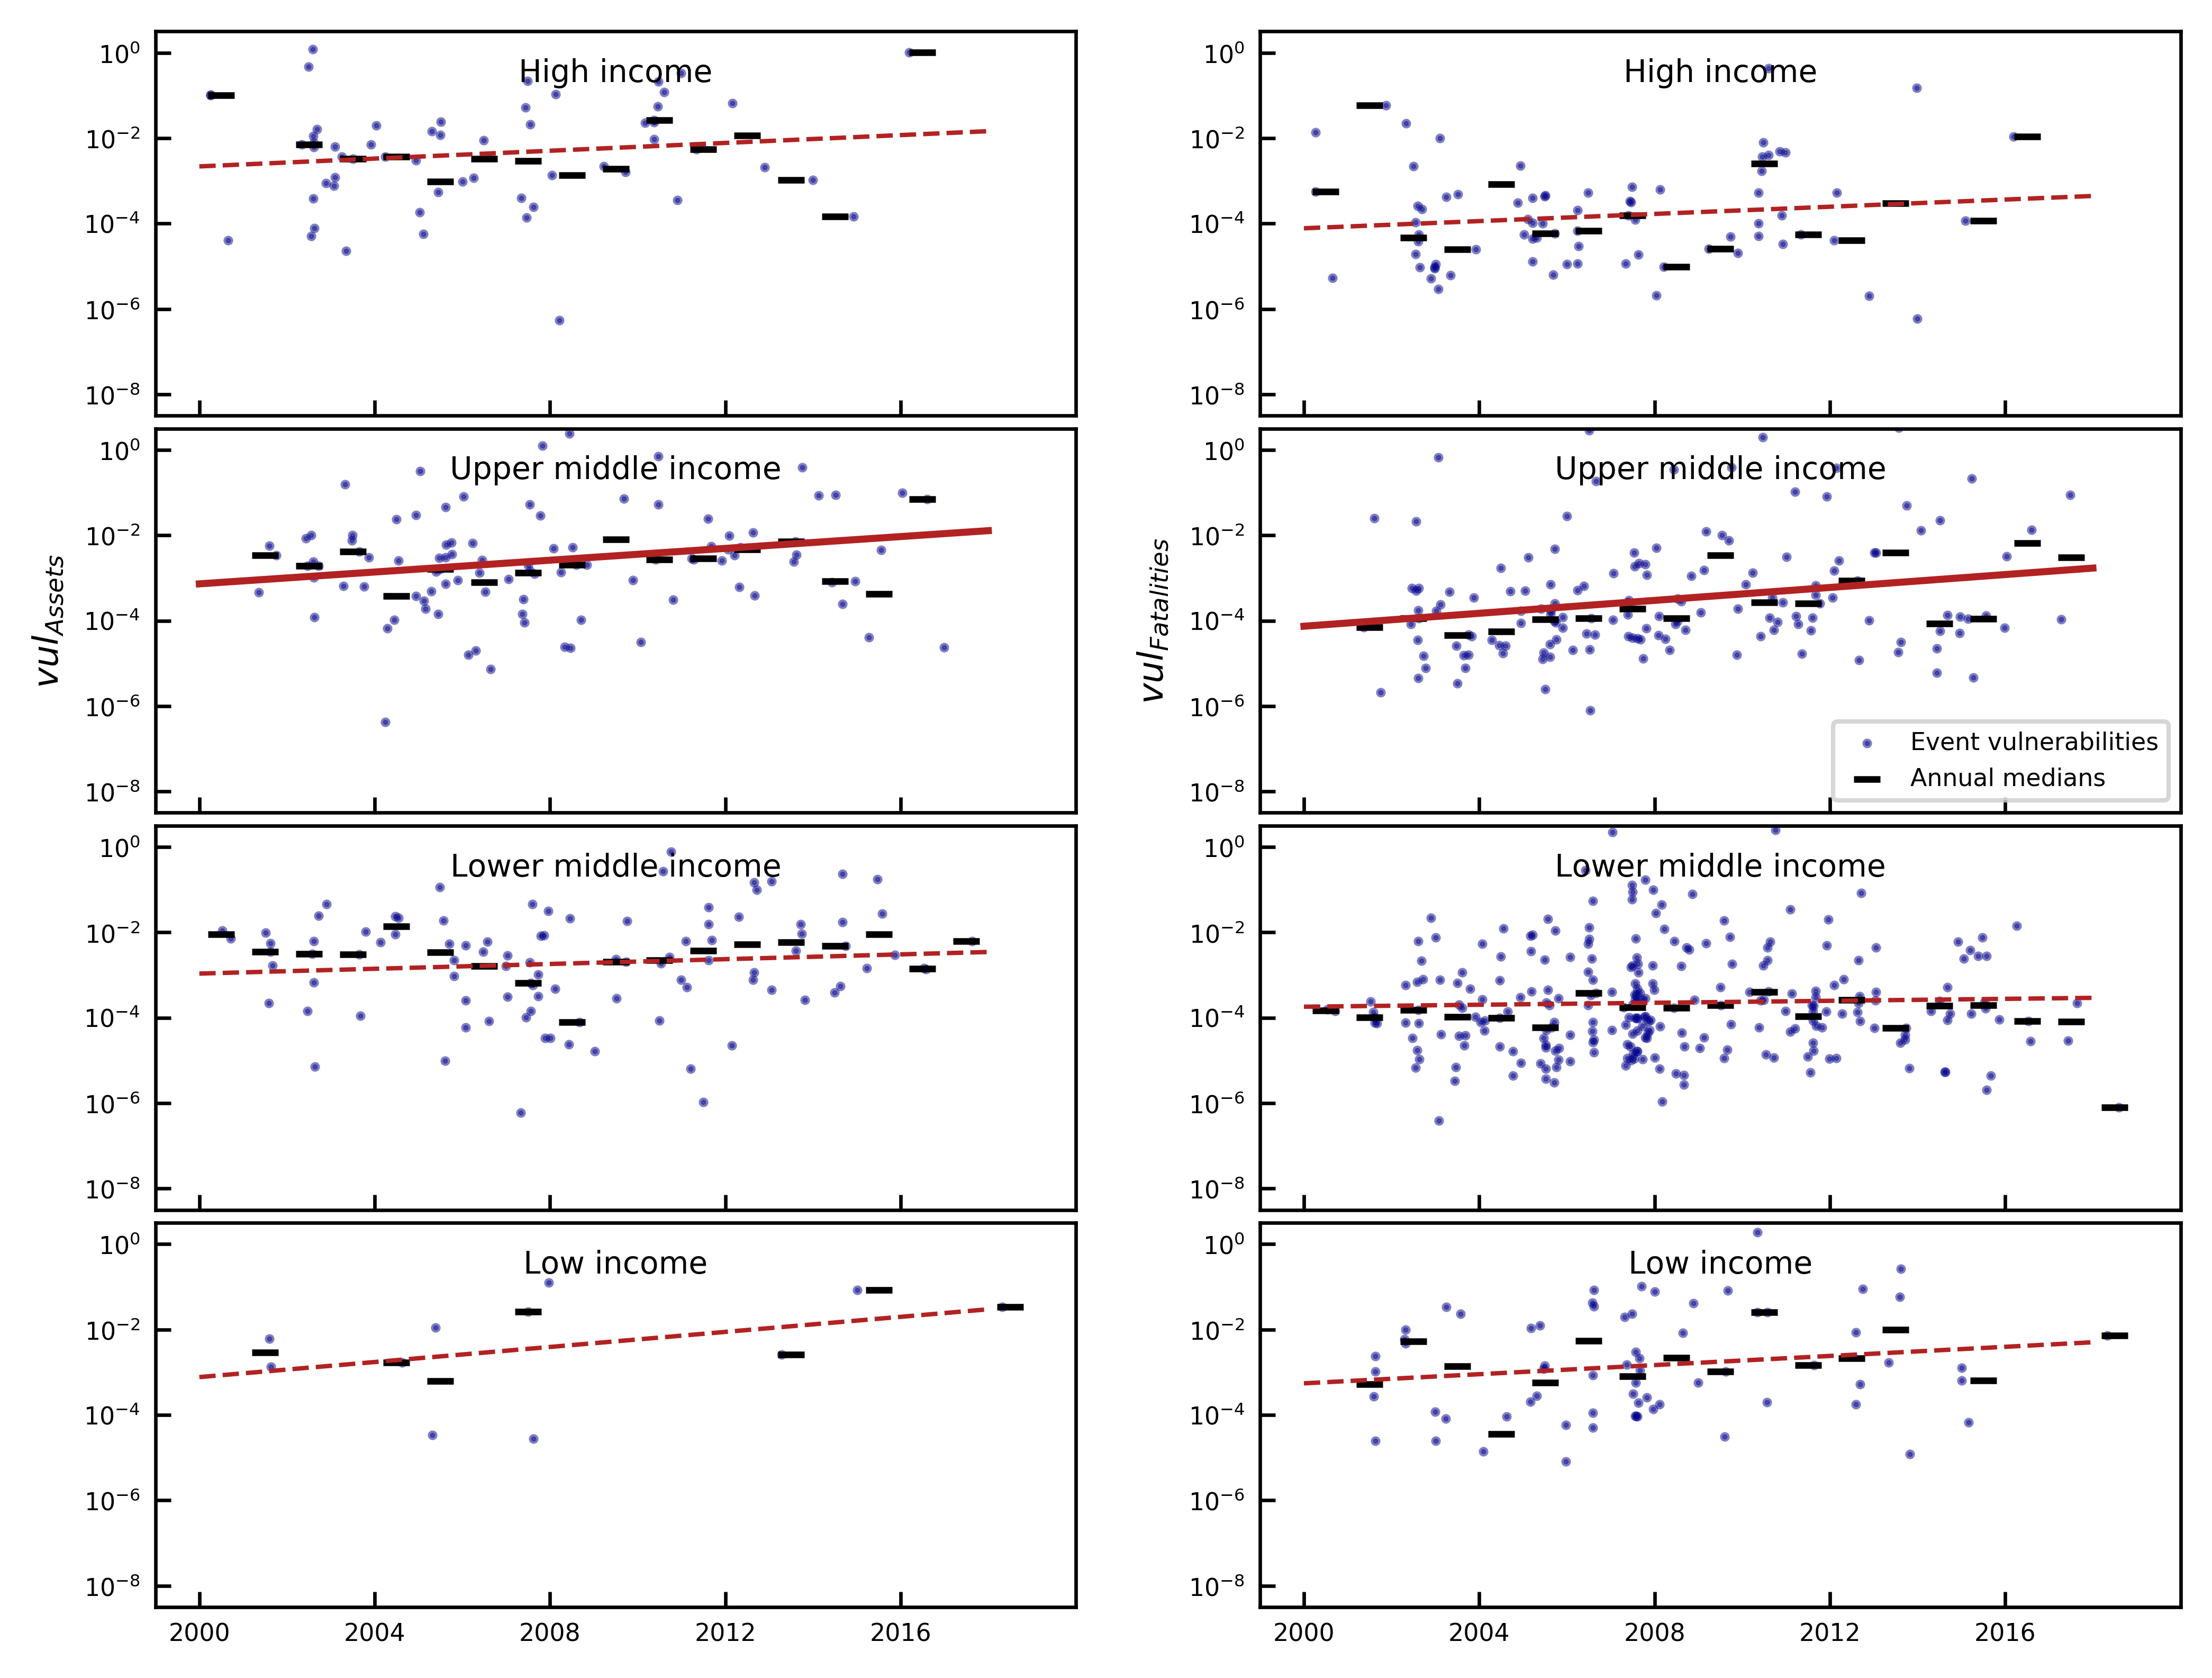

In [83]:
fig1 = plt.figure(figsize=(x_width,y_width), dpi=600)
plt.subplots_adjust(top=0.95, bottom= 0.05, left= 0.05, right=0.95, wspace=0.2, hspace=0.15)

fig1.patch.set_facecolor('white')
variables_log=['log_vul_asset', 'log_vul_fat', 'log_vul_dis']
variables=['vul_asset', 'vul_fat', 'vul_dis']

units=['Number events','Number events','Number events', 'Number events',
       'USD 2011 PPP','USD 2011 PPP', 'People', 'People']
titles=['NATCAT events since 1980','EMDAT events since 1980','NATCAT events since 2000',
        'EMDAT events since 2000', 'NATCAT Damage','EMDAT Damage', 'NATCAT Fatalities','EMDAT Fatalities']
gs = fig1.add_gridspec(16, 2)
trends=pd.DataFrame()
v=0
ending=['NATCAT', 'EMDAT']

for i,row in enumerate([0,4,8,12]):
    print(regions[i])
    for col in [0,1]:
        f3_ax1 = fig1.add_subplot(gs[row: row+4, col:col+1])
        temp_results=pd.DataFrame()
        if col < 2:
            

            yearly_means=emdat_matched.loc[emdat_matched['income_group']==regions[i]].groupby('year').mean()
            yearly_std=emdat_matched.loc[emdat_matched['income_group']==regions[i]].groupby('year').std()
            yearly_medians=emdat_matched.loc[emdat_matched['income_group']==regions[i]].groupby('year').median()


            f3_ax1.scatter(emdat_matched.loc[emdat_matched['income_group']==regions[i],'day_plot'],
                           emdat_matched.loc[emdat_matched['income_group']==regions[i],variables_log[col]],
                            alpha=0.5, s=1.4, color='darkblue', label='Event vulnerabilities')
            
            f3_ax1.scatter(yearly_medians.index+0.5, yearly_medians[variables_log[col]],
                             marker='_',color='k', label='Annual medians')

            sig = mk.original_test(emdat_matched.loc[emdat_matched['income_group']==regions[i],variables[col]], alpha=0.1)
            sig_year= mk.original_test(yearly_means[variables[col]], alpha=0.1)
            if sig.p<0.001:

                mk_slope="%.3E" % sig.slope+'***'
            elif sig.p<0.01:
                mk_slope="%.3E" % sig.slope+'**'
            elif sig.p<0.05:
                mk_slope="%.3E" % sig.slope+'*'
            else:
                mk_slope="%.3E" % sig.slope
            
            if sig_year.p<0.001:

                mk_slope_ann="%.3E" % sig_year.slope+'***'
            elif sig_year.p<0.01:
                mk_slope_ann="%.3E" % sig_year.slope+'**'
            elif sig_year.p<0.05:
                mk_slope_ann="%.3E" % sig_year.slope+'*'
            else:
                mk_slope_ann="%.3E" % sig_year.slope
                
            temp_results.loc[regions[i] + ' '+names[col], 'Mann-Kendall']=mk_slope
            temp_results.loc[regions[i] + ' '+names[col], 'Mann-Kendall annual mean']=mk_slope_ann    
                
            df1=pd.DataFrame()
            df1['day_plot']=emdat_matched.loc[emdat_matched['income_group']==regions[i],'day_plot']
            df1['const']=1

            reg1 = sm.OLS(endog=emdat_matched.loc[emdat_matched['income_group']==regions[i],variables_log[col]], exog=df1[['const','day_plot']], 
                missing='drop')

            results = reg1.fit()
            y_ax=results.params[0]
            slope= results.params[1]
            y = slope*np.arange(2000,2019) + y_ax

            r=results.pvalues[1]
            if r<0.001:
        
                sl="%.3f" % round(slope,3)+'***'
            elif r<0.01:
                sl="%.3f" % round(slope,3)+'**'
            elif r<0.05:
                sl="%.3f" % round(slope,3)+'*'
            else:
                sl="%.3f" % round(slope,3)
            
            if r <0.05:
                f3_ax1.plot(np.arange(2000,2019), y, c ='firebrick', linewidth=1.6)
            else:
                f3_ax1.plot(np.arange(2000,2019), y, c ='firebrick', linewidth=1, linestyle='--')
            
            df1=pd.DataFrame()
            df1['day_plot']=yearly_means.index
            df1['const']=1
            reg1 = sm.OLS(endog=yearly_means.reset_index()[variables_log[col]], exog=df1[['const','day_plot']], 
                missing='drop')

            results = reg1.fit()
            y_ax=results.params[0]
            slope= results.params[1]
            y = slope*np.arange(2000,2019) + y_ax

            r_year=results.pvalues[1]
            
            if r_year<0.001:
        
                sl_year="%.3f" % round(slope,3)+'***'
            elif r_year<0.01:
                sl_year="%.3f" % round(slope,3)+'**'
            elif r_year<0.05:
                sl_year="%.3f" % round(slope,3)+'*'
            else:
                sl_year="%.3f" % round(slope,3)
            #f3_ax1.plot(np.arange(2000,2019), y, c =lgr, linewidth=0.6)

            f3_ax1.set_ylim([-8.5,0.5])
            if i==1 and col==0:
                f3_ax1.set_ylabel('$vul_{Assets}$', fontsize=8)
            if i==1 and col==1:
                f3_ax1.set_ylabel('$vul_{Fatalities}$', fontsize=8)
                f3_ax1.legend(fontsize=5.5, loc='lower right')
            f3_ax1.set_yticks([-8,-6,-4,-2,0])
            temp_results.loc[regions[i] + ' '+names[col], 'OLS']=sl
            temp_results.loc[regions[i] + ' '+names[col], 'OLS annual mean']=sl_year
            trends=trends.append(temp_results,ignore_index=False)
            f3_ax1.set_yticks([-8,-6,-4,-2,0])
            f3_ax1.set_yticklabels(['$10^{-8}$','$10^{-6}$','$10^{-4}$','$10^{-2}$','$10^{0}$'], fontsize=5)

        f3_ax1.set_title(regions[i], fontsize=7, y=0.8)
        f3_ax1.set_xlim([1999,2020])
        f3_ax1.set_xticks([2000,2004,2008,2012,2016])
        f3_ax1.tick_params(axis='both', which='major', labelsize=5.5,direction='in')
plt.savefig('/home/insauer/projects/submission_vul_sat/supplementary_figures/SI_trends_ig_emdat.png')
print(trends)
trends.to_csv('/home/insauer/projects/submission_vul_sat/supplementary_tables/income_trends_emdat.csv')

## 4 Trend assessment in socio-economic variables

In [68]:
# function that groups 
def agg(x):
    dec_10=x['HDI_mean'].quantile(q=0.1)
    dec_30=x['HDI_mean'].quantile(q=0.3)
    dec_50=x['HDI_mean'].quantile(q=0.5)
    dec_70=x['HDI_mean'].quantile(q=0.7)
    dec_90=x['HDI_mean'].quantile(q=0.9)
    return pd.Series({'dec_10':dec_10,
                      'dec_30':dec_30,
                      'dec_50':dec_50,
                      'dec_70':dec_70,
                      'dec_90':dec_90,
                     })

In [69]:
def agg2(x):
    dec_10=x['GDPpc_mean'].quantile(q=0.1)
    dec_30=x['GDPpc_mean'].quantile(q=0.3)
    dec_50=x['GDPpc_mean'].quantile(q=0.5)
    dec_70=x['GDPpc_mean'].quantile(q=0.7)
    dec_90=x['GDPpc_mean'].quantile(q=0.9)
    return pd.Series({'dec_10':dec_10,
                      'dec_30':dec_30,
                      'dec_50':dec_50,
                      'dec_70':dec_70,
                      'dec_90':dec_90,
                     })

In [70]:
yearly_median=natcat_matched.groupby('year').median()
yearly_median_10=natcat_matched.groupby(['year']).apply(agg)
yearly_median_GDPpc=natcat_matched.groupby(['year']).apply(agg2)
#yearly_median_30=natcat_matched.groupby('year').quantile(q=0.3)
#yearly_median_70=natcat_matched.groupby('year').quantile(q=0.7)
#yearly_median_90=natcat_matched.groupby('year').quantile(q=0.9)

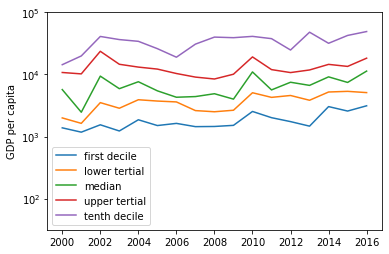

In [84]:
plt.plot(np.log10(yearly_median_GDPpc['dec_10']), label= 'first decile')
plt.plot(np.log10(yearly_median_GDPpc['dec_30']), label= 'lower tertial')
plt.plot(np.log10(yearly_median_GDPpc['dec_50']), label= 'median')
plt.plot(np.log10(yearly_median_GDPpc['dec_70']), label= 'upper tertial')
plt.plot(np.log10(yearly_median_GDPpc['dec_90']), label= 'tenth decile')
plt.legend()
plt.ylim([1.5,5])
plt.yticks([2,3,4,5],['$10^{2}$', '$10^{3}$', '$10^{4}$', '$10^{5}$'])
plt.ylabel('GDP per capita')
plt.savefig('/home/insauer/projects/submission_vul_sat/supplementary_figures/SI_trends_in_GDPpc.png')

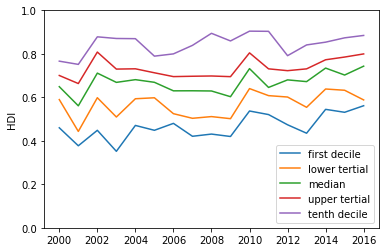

In [85]:
plt.plot(yearly_median_10['dec_10'], label= 'first decile')
plt.plot(yearly_median_10['dec_30'], label= 'lower tertial')
plt.plot(yearly_median_10['dec_50'], label= 'median')
plt.plot(yearly_median_10['dec_70'], label= 'upper tertial')
plt.plot(yearly_median_10['dec_90'], label= 'tenth decile')
plt.legend()
plt.ylim([0,1])
plt.ylabel('HDI')
plt.savefig('/home/insauer/projects/submission_vul_sat/supplementary_figures/SI_trends_in_HDI.png')